<a href="https://colab.research.google.com/github/dannynacker/strobe_entrainment_periodicity_MSc/blob/main/dynamic_resonance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

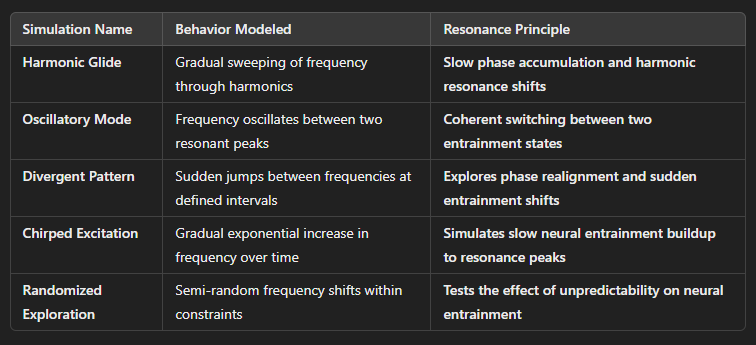

Try messing with all of these!

Generated yHG_Sq.txt
Generated yHG_Si.txt
Generated yOM_Sq.txt
Generated yOM_Si.txt
Generated yDP_Sq.txt
Generated yDP_Si.txt
Generated yCE_Sq.txt
Generated yCE_Si.txt
Generated yRE_Sq.txt
Generated yRE_Si.txt


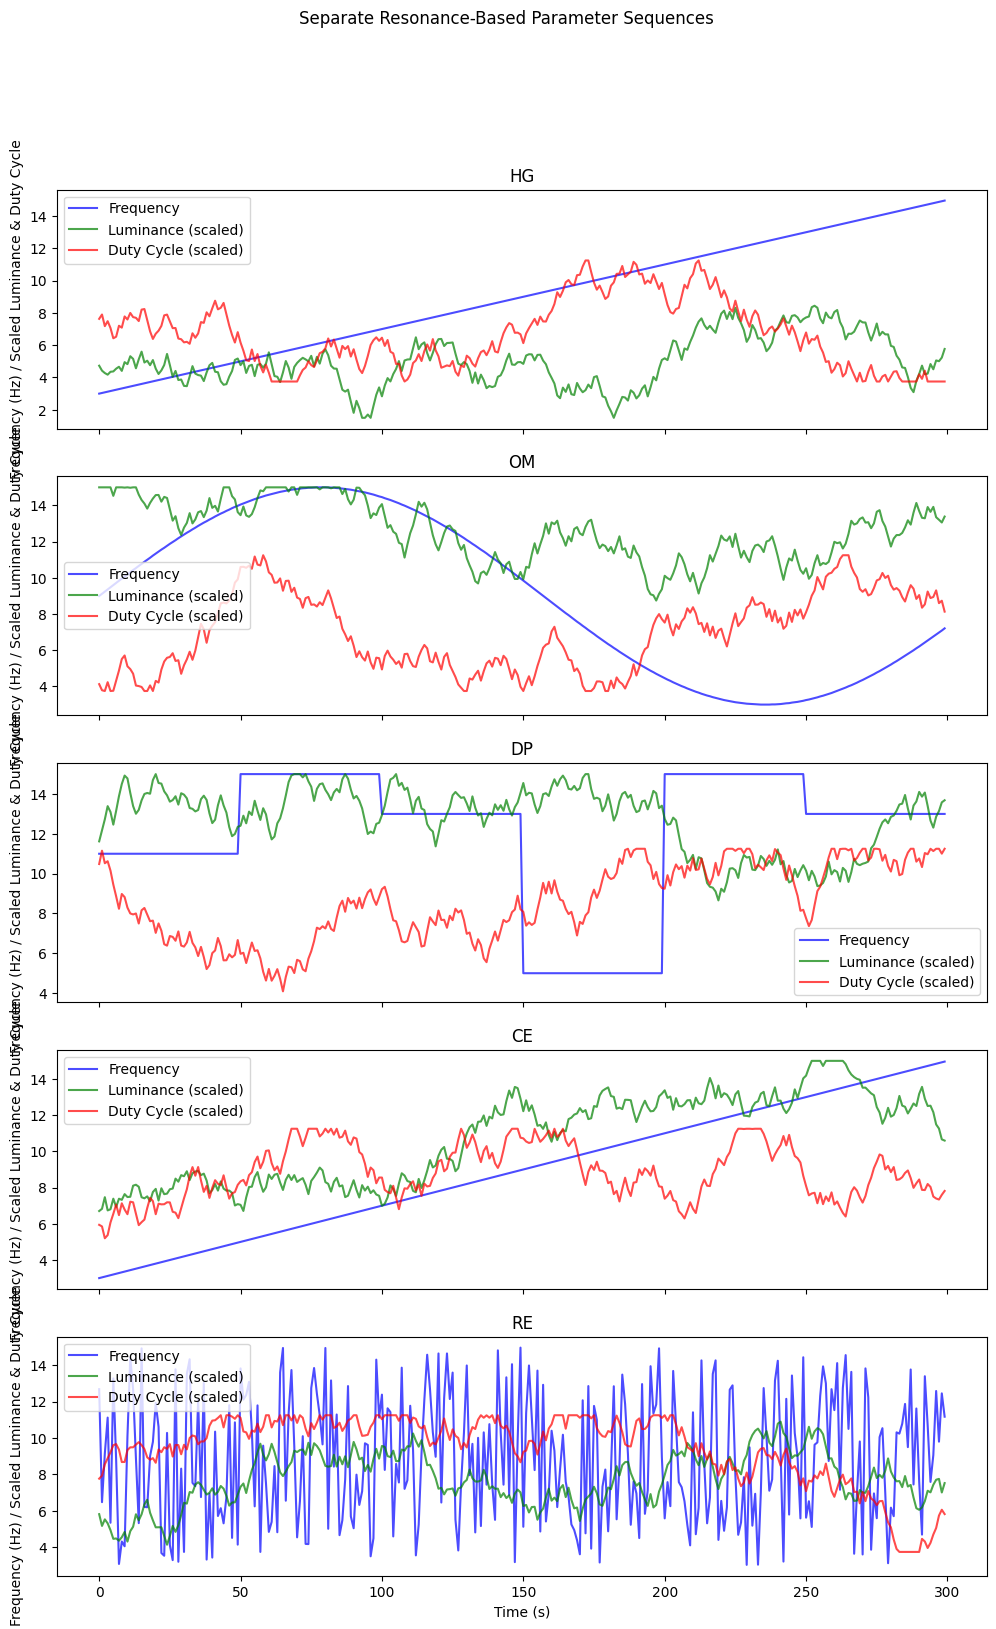

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Session parameters
session_duration = 300  # 5 minutes (300 seconds)
time_step = 1.0  # 1s resolution
num_steps = int(session_duration / time_step)

# Parameter constraints
frequency_range = (3, 15)  # Hz
luminance_range = (10, 100)  # Arbitrary units
duty_cycle_range = (25, 75)  # Percentage
max_freq_jump_ratio = 2.2  # Maximum step size ratio for frequency shifts

# Generate different resonance-based sequences

def generate_sequence(mode):
    time = np.arange(0, session_duration, time_step)
    frequency = np.zeros(num_steps)
    luminance = np.zeros(num_steps)
    duty_cycle = np.zeros(num_steps)

    # Ensure full range exploration
    freq = np.random.uniform(*frequency_range)
    lum = np.random.uniform(*luminance_range)
    duty = np.random.uniform(*duty_cycle_range)

    for i in range(num_steps):
        progress = i / num_steps
        if mode == "harmonic_glide":
            freq = 3 + 12 * progress  # Sweep through full frequency range
        elif mode == "oscillatory_mode":
            freq = 9 + 6 * np.sin(i / 50)  # Oscillates within range
        elif mode == "divergent_pattern":
            if i % 50 == 0:
                freq = np.random.choice(np.linspace(3, 15, 7))
        elif mode == "chirped_excitation":
            freq = 3 * (1 + progress * 4)  # Exponentially rising pattern
        elif mode == "randomized_exploration":
            freq = np.random.uniform(*frequency_range)

        freq = np.clip(freq, *frequency_range)
        lum = np.clip(lum + np.random.uniform(-5, 5), *luminance_range)
        duty = np.clip(duty + np.random.uniform(-5, 5), *duty_cycle_range)

        frequency[i] = round(freq, 2)
        luminance[i] = lum
        duty_cycle[i] = duty

    return pd.DataFrame({
        "Time (s)": time.astype(int),
        "Frequency (Hz)": frequency,
        "Luminance": luminance,
        "Duty Cycle (%)": duty_cycle
    })

# Generate all sequences
base_sequences = {
    "HG": generate_sequence("harmonic_glide"),
    "OM": generate_sequence("oscillatory_mode"),
    "DP": generate_sequence("divergent_pattern"),
    "CE": generate_sequence("chirped_excitation"),
    "RE": generate_sequence("randomized_exploration"),
}

# Create 10 total sequences (5 square wave, 5 sine wave)
strobe_sequences = {}
for mode, df in base_sequences.items():
    strobe_sequences[f"y{mode}_Sq"] = df.copy()
    strobe_sequences[f"y{mode}_Si"] = df.copy()

# Generate STP-compatible output
def format_strobe_sequence(df, wave_type):
    output = []
    output.append(f'TIM"00:00:{session_duration:02}.0"')
    output.append(f'DUR"{session_duration:.1f}"')

    for _, row in df.iterrows():
        step_duration = 1.0
        start_freq = row["Frequency (Hz)"]
        end_freq = row["Frequency (Hz)"]
        start_l = row["Luminance"]
        end_l = row["Luminance"]
        start_d = row["Duty Cycle (%)"]
        end_d = row["Duty Cycle (%)"]

        stp_line = f'STP"{step_duration:.1f},{wave_type},{start_freq:.2f},{end_freq:.2f},{start_d},{end_d},1,1,1,1,{start_l},{end_l}"'
        output.append(stp_line)

    return "\r\n".join(output)

# Save to properly formatted .txt files
for mode, df in strobe_sequences.items():
    wave_type = 1 if "Sq" in mode else 2  # 1 = Square, 2 = Sine
    strobe_data = format_strobe_sequence(df, wave_type)
    filename = f"{mode}.txt"
    with open(filename, "w", encoding="utf-8") as f:
        f.write(strobe_data)
    print(f"Generated {filename}")

# Create separate plots for each sequence
fig, axes = plt.subplots(5, 1, figsize=(12, 18), sharex=True)

colors = {
    "Frequency": "blue",
    "Luminance": "green",
    "Duty Cycle (%)": "red"
}

for ax, (mode, df) in zip(axes, base_sequences.items()):
    ax.plot(df["Time (s)"], df["Frequency (Hz)"], label="Frequency", color=colors["Frequency"], alpha=0.7)
    ax.plot(df["Time (s)"], df["Luminance"] / 100 * 15, label="Luminance (scaled)", color=colors["Luminance"], alpha=0.7)
    ax.plot(df["Time (s)"], df["Duty Cycle (%)"] / 100 * 15, label="Duty Cycle (scaled)", color=colors["Duty Cycle (%)"], alpha=0.7)
    ax.set_ylabel("Frequency (Hz) / Scaled Luminance & Duty Cycle")
    ax.set_title(mode)
    ax.legend()

plt.xlabel("Time (s)")
plt.suptitle("Separate Resonance-Based Parameter Sequences")
plt.show()


HG: Slow phase alignment & entrainment buildup.
OM: Cyclic phase realignment for stronger coherence.
DP: Sudden shifts for phase-reset-based entrainment.
CE: Gradual nonlinear increases for sustained coherence.
RE: Stochastic exploration of resonance states.

fade in and fade out of parameter intensity based on sinusoidal modulation of settings

Generated yHG_Sq.txt
Generated yHG_Si.txt
Generated yOM_Sq.txt
Generated yOM_Si.txt
Generated yDP_Sq.txt
Generated yDP_Si.txt
Generated yCE_Sq.txt
Generated yCE_Si.txt
Generated yRE_Sq.txt
Generated yRE_Si.txt


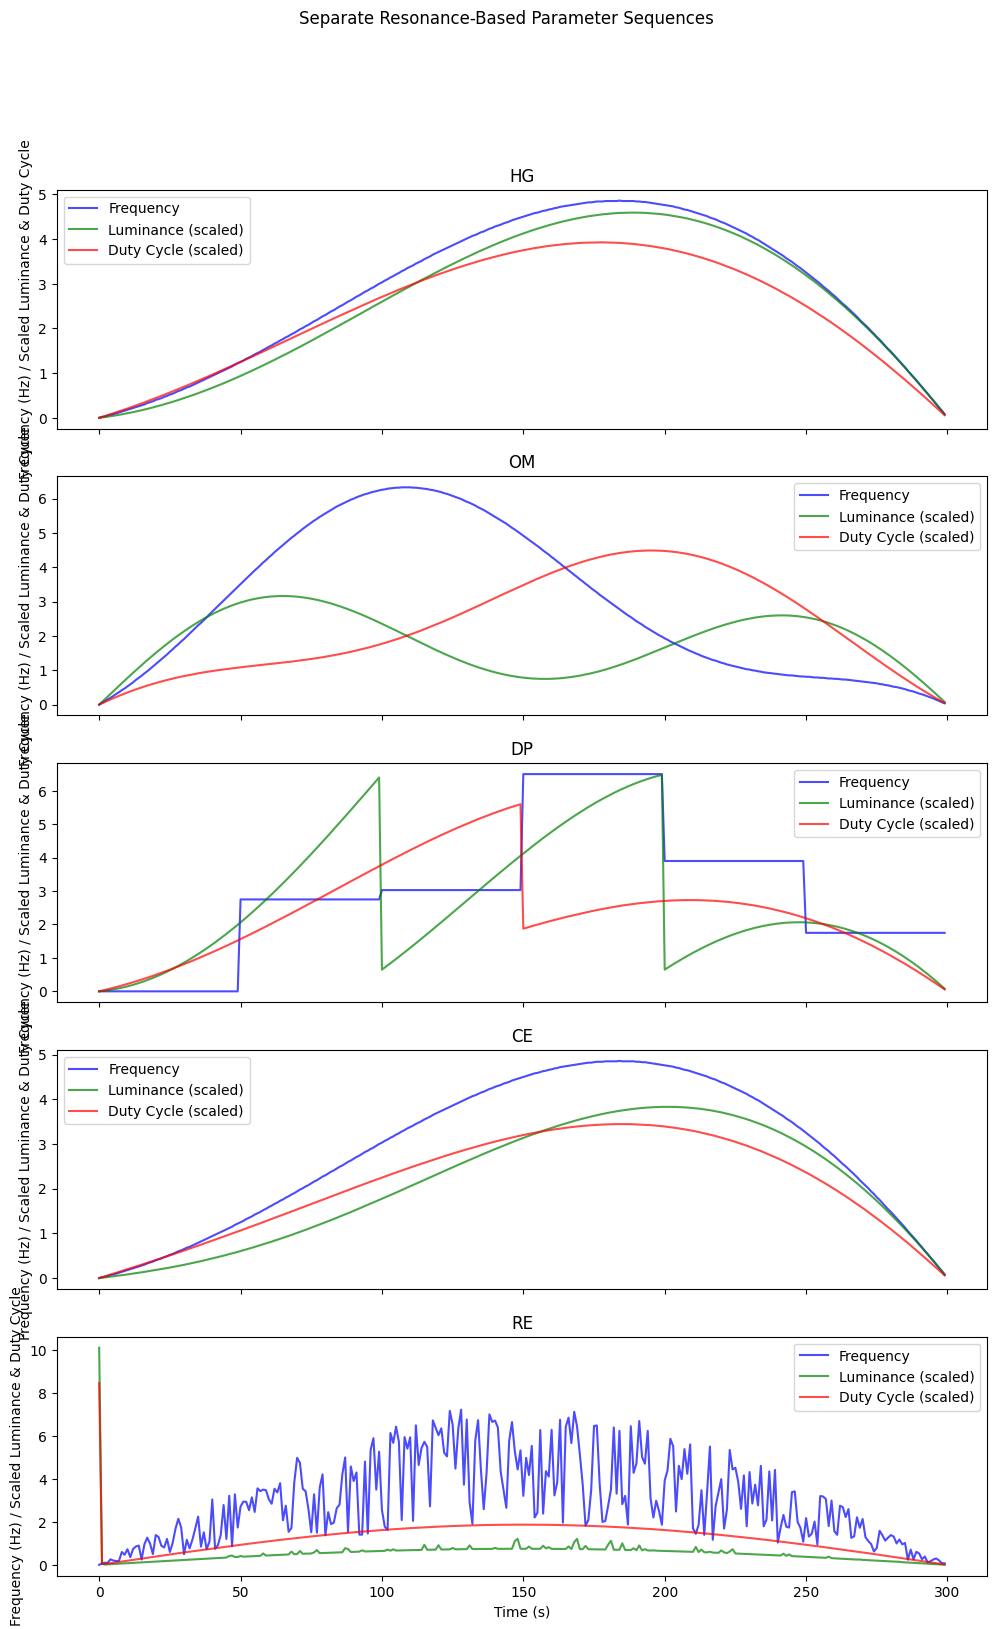

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Session parameters
session_duration = 300  # 5 minutes (300 seconds)
time_step = 1.0  # 1s resolution
num_steps = int(session_duration / time_step)

# Parameter constraints
frequency_range = (3, 15)  # Hz
luminance_range = (10, 100)  # Arbitrary units
duty_cycle_range = (25, 75)  # Percentage
max_freq_jump_ratio = 2.2  # Maximum step size ratio for frequency shifts

# Generate different resonance-based sequences

def generate_sequence(mode):
    time = np.arange(0, session_duration, time_step)
    frequency = np.zeros(num_steps)
    luminance = np.zeros(num_steps)
    duty_cycle = np.zeros(num_steps)

    for i in range(num_steps):
        progress = i / num_steps
        fade_in = np.sin(progress * np.pi / 2)  # Smooth ramp-up
        fade_out = np.sin((1 - progress) * np.pi / 2)  # Smooth ramp-down

        if mode == "harmonic_glide":
            freq = (3 + 12 * progress) * fade_in * fade_out  # Sweep with intensity modulation
            lum = (10 + 90 * progress) * fade_in * fade_out  # Smooth luminance progression
            duty = (25 + 50 * progress) * fade_in * fade_out  # Smooth duty cycle ramp
        elif mode == "oscillatory_mode":
            freq = (9 + 6 * np.sin(i / 50)) * fade_in * fade_out  # Oscillates with intensity modulation
            lum = (55 + 45 * np.sin(i / 50 + np.pi / 2)) * fade_in * fade_out  # Phase shift in luminance
            duty = (50 + 25 * np.sin(i / 50 + np.pi)) * fade_in * fade_out  # Phase-shifted duty cycle
        elif mode == "divergent_pattern":
            if i % 50 == 0:
                freq = np.random.choice(np.linspace(3, 15, 7)) * fade_in * fade_out
            lum = (10 + 90 * (i % 100 / 100)) * fade_in * fade_out  # Stepwise luminance shifts
            duty = (25 + 50 * (i % 150 / 150)) * fade_in * fade_out  # Stepwise duty cycle shifts
        elif mode == "chirped_excitation":
            freq = (3 * (1 + progress * 4)) * fade_in * fade_out  # Exponentially rising pattern with modulation
            lum = (10 + (90 * (progress ** 1.5))) * fade_in * fade_out  # Logarithmic luminance
            duty = (25 + (50 * (progress ** 1.5))) * fade_in * fade_out  # Logarithmic duty cycle
        elif mode == "randomized_exploration":
            freq = np.random.uniform(*frequency_range) * fade_in * fade_out
            lum = np.clip(luminance[i-1] + np.random.uniform(-10, 10), *luminance_range) * fade_in * fade_out if i > 0 else np.random.uniform(*luminance_range)
            duty = np.clip(duty_cycle[i-1] + np.random.uniform(-10, 10), *duty_cycle_range) * fade_in * fade_out if i > 0 else np.random.uniform(*duty_cycle_range)

        frequency[i] = round(freq, 2)
        luminance[i] = round(lum, 2)
        duty_cycle[i] = round(duty, 2)

    return pd.DataFrame({
        "Time (s)": time.astype(int),
        "Frequency (Hz)": frequency,
        "Luminance": luminance,
        "Duty Cycle (%)": duty_cycle
    })

# Generate all sequences
base_sequences = {
    "HG": generate_sequence("harmonic_glide"),
    "OM": generate_sequence("oscillatory_mode"),
    "DP": generate_sequence("divergent_pattern"),
    "CE": generate_sequence("chirped_excitation"),
    "RE": generate_sequence("randomized_exploration"),
}

# Create 10 total sequences (5 square wave, 5 sine wave)
strobe_sequences = {}
for mode, df in base_sequences.items():
    strobe_sequences[f"y{mode}_Sq"] = df.copy()
    strobe_sequences[f"y{mode}_Si"] = df.copy()

# Generate STP-compatible output
def format_strobe_sequence(df, wave_type):
    output = []
    output.append(f'TIM"00:00:{session_duration:02}.0"')
    output.append(f'DUR"{session_duration:.1f}"')

    for _, row in df.iterrows():
        step_duration = 1.0
        start_freq = row["Frequency (Hz)"]
        end_freq = row["Frequency (Hz)"]
        start_l = row["Luminance"]
        end_l = row["Luminance"]
        start_d = row["Duty Cycle (%)"]
        end_d = row["Duty Cycle (%)"]

        stp_line = f'STP"{step_duration:.1f},{wave_type},{start_freq:.2f},{end_freq:.2f},{start_d},{end_d},1,1,1,1,{start_l},{end_l}"'
        output.append(stp_line)

    return "\r\n".join(output)

# Save to properly formatted .txt files
for mode, df in strobe_sequences.items():
    wave_type = 1 if "Sq" in mode else 2  # 1 = Square, 2 = Sine
    strobe_data = format_strobe_sequence(df, wave_type)
    filename = f"{mode}.txt"
    with open(filename, "w", encoding="utf-8") as f:
        f.write(strobe_data)
    print(f"Generated {filename}")

# Create separate plots for each sequence
fig, axes = plt.subplots(5, 1, figsize=(12, 18), sharex=True)

colors = {
    "Frequency": "blue",
    "Luminance": "green",
    "Duty Cycle (%)": "red"
}

for ax, (mode, df) in zip(axes, base_sequences.items()):
    ax.plot(df["Time (s)"], df["Frequency (Hz)"], label="Frequency", color=colors["Frequency"], alpha=0.7)
    ax.plot(df["Time (s)"], df["Luminance"] / 100 * 15, label="Luminance (scaled)", color=colors["Luminance"], alpha=0.7)
    ax.plot(df["Time (s)"], df["Duty Cycle (%)"] / 100 * 15, label="Duty Cycle (scaled)", color=colors["Duty Cycle (%)"], alpha=0.7)
    ax.set_ylabel("Frequency (Hz) / Scaled Luminance & Duty Cycle")
    ax.set_title(mode)
    ax.legend()

plt.xlabel("Time (s)")
plt.suptitle("Separate Resonance-Based Parameter Sequences")
plt.show()


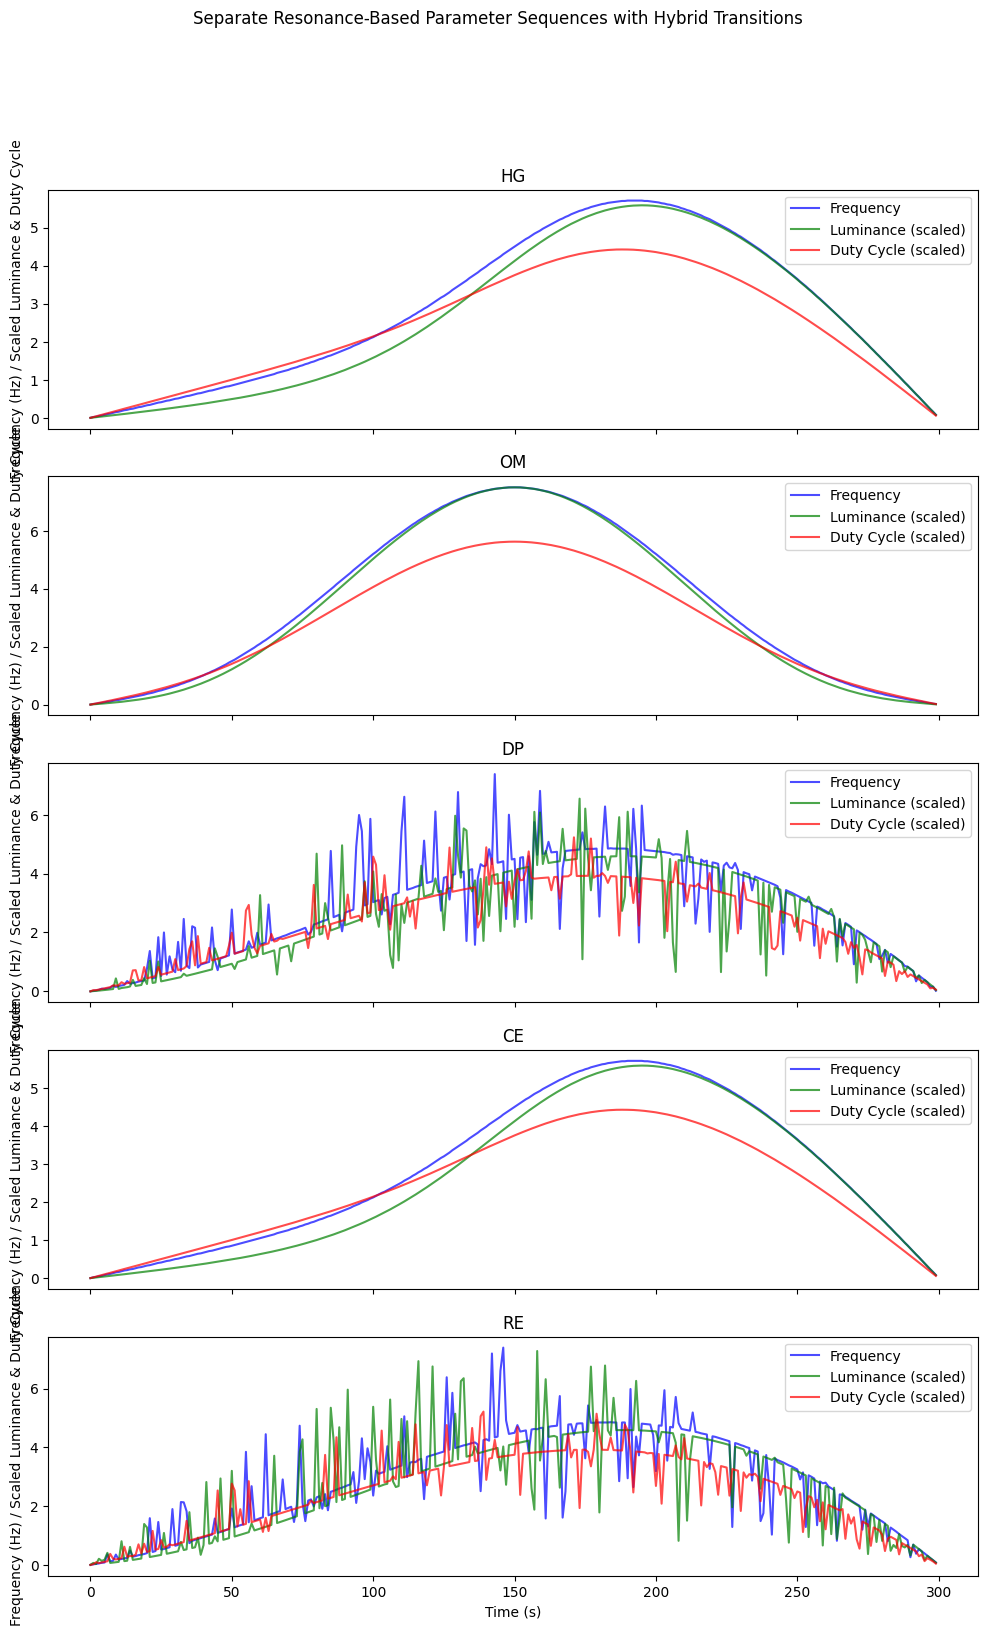

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Session parameters
session_duration = 300  # 5 minutes (300 seconds)
time_step = 1.0  # 1s resolution
num_steps = int(session_duration / time_step)

# Parameter constraints
frequency_range = (3, 15)  # Hz
luminance_range = (10, 100)  # Arbitrary units
duty_cycle_range = (25, 75)  # Percentage

# Function for hybrid frequency transition (erratic & smooth combined)
def hybrid_transition(progress, min_val, max_val, mode):
    if mode == "smooth":
        return min_val + (max_val - min_val) * (1 / (1 + np.exp(-10 * (progress - 0.5))))
    elif mode == "erratic":
        return np.random.uniform(min_val, max_val) if np.random.rand() < 0.3 else min_val + (max_val - min_val) * progress
    else:
        return min_val + (max_val - min_val) * (np.sin(progress * np.pi) ** 2)

# Generate different resonance-based sequences

def generate_sequence(mode):
    time = np.arange(0, session_duration, time_step)
    frequency = np.zeros(num_steps)
    luminance = np.zeros(num_steps)
    duty_cycle = np.zeros(num_steps)

    for i in range(num_steps):
        progress = i / num_steps
        fade_in = np.sin(progress * np.pi / 2)  # Smooth ramp-up
        fade_out = np.sin((1 - progress) * np.pi / 2)  # Smooth ramp-down

        if mode == "harmonic_glide":
            freq = hybrid_transition(progress, 3, 15, "smooth") * fade_in * fade_out
            lum = hybrid_transition(progress, 10, 100, "smooth") * fade_in * fade_out
            duty = hybrid_transition(progress, 25, 75, "smooth") * fade_in * fade_out
        elif mode == "oscillatory_mode":
            freq = hybrid_transition(progress, 3, 15, "sinusoidal") * fade_in * fade_out
            lum = hybrid_transition(progress, 10, 100, "sinusoidal") * fade_in * fade_out
            duty = hybrid_transition(progress, 25, 75, "sinusoidal") * fade_in * fade_out
        elif mode == "divergent_pattern":
            freq = hybrid_transition(progress, 3, 15, "erratic") * fade_in * fade_out
            lum = hybrid_transition(progress, 10, 100, "erratic") * fade_in * fade_out
            duty = hybrid_transition(progress, 25, 75, "erratic") * fade_in * fade_out
        elif mode == "chirped_excitation":
            freq = hybrid_transition(progress, 3, 15, "smooth") * fade_in * fade_out
            lum = hybrid_transition(progress, 10, 100, "smooth") * fade_in * fade_out
            duty = hybrid_transition(progress, 25, 75, "smooth") * fade_in * fade_out
        elif mode == "randomized_exploration":
            freq = hybrid_transition(progress, 3, 15, "erratic") * fade_in * fade_out
            lum = hybrid_transition(progress, 10, 100, "erratic") * fade_in * fade_out
            duty = hybrid_transition(progress, 25, 75, "erratic") * fade_in * fade_out

        frequency[i] = round(freq, 2)
        luminance[i] = round(lum, 2)
        duty_cycle[i] = round(duty, 2)

    return pd.DataFrame({
        "Time (s)": time.astype(int),
        "Frequency (Hz)": frequency,
        "Luminance": luminance,
        "Duty Cycle (%)": duty_cycle
    })

# Generate all sequences
base_sequences = {
    "HG": generate_sequence("harmonic_glide"),
    "OM": generate_sequence("oscillatory_mode"),
    "DP": generate_sequence("divergent_pattern"),
    "CE": generate_sequence("chirped_excitation"),
    "RE": generate_sequence("randomized_exploration"),
}

# Create separate plots for each sequence
fig, axes = plt.subplots(5, 1, figsize=(12, 18), sharex=True)

colors = {
    "Frequency": "blue",
    "Luminance": "green",
    "Duty Cycle (%)": "red"
}

for ax, (mode, df) in zip(axes, base_sequences.items()):
    ax.plot(df["Time (s)"], df["Frequency (Hz)"], label="Frequency", color=colors["Frequency"], alpha=0.7)
    ax.plot(df["Time (s)"], df["Luminance"] / 100 * 15, label="Luminance (scaled)", color=colors["Luminance"], alpha=0.7)
    ax.plot(df["Time (s)"], df["Duty Cycle (%)"] / 100 * 15, label="Duty Cycle (scaled)", color=colors["Duty Cycle (%)"], alpha=0.7)
    ax.set_ylabel("Frequency (Hz) / Scaled Luminance & Duty Cycle")
    ax.set_title(mode)
    ax.legend()

plt.xlabel("Time (s)")
plt.suptitle("Separate Resonance-Based Parameter Sequences with Hybrid Transitions")
plt.show()


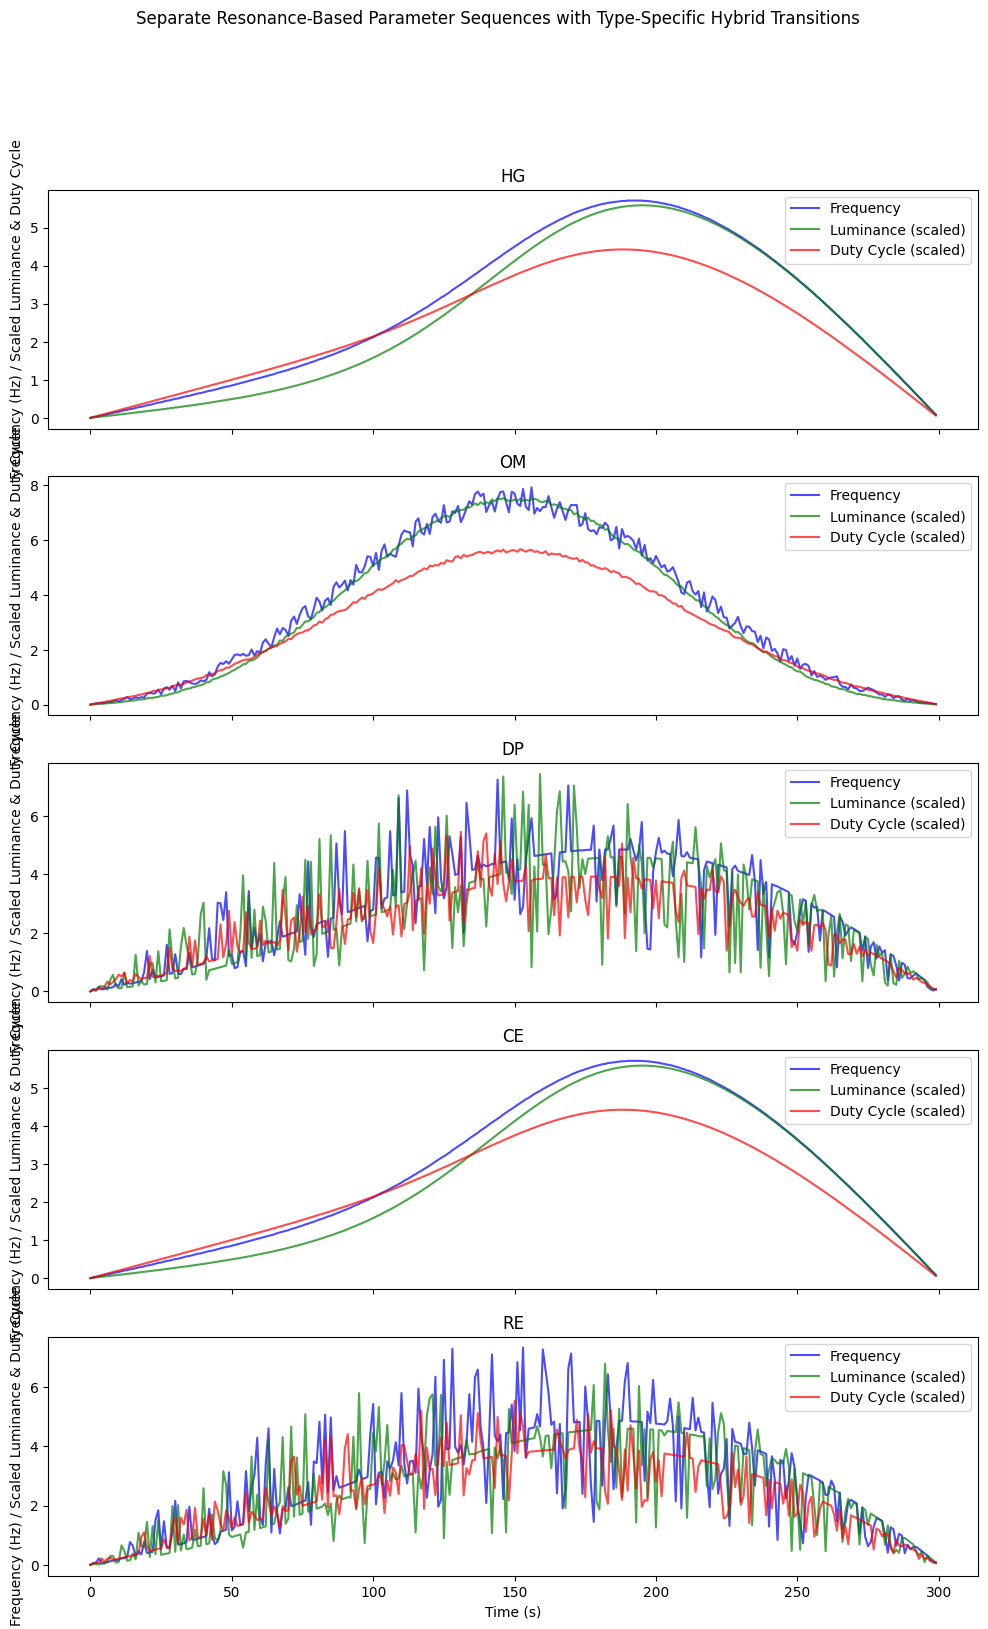

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Session parameters
session_duration = 300  # 5 minutes (300 seconds)
time_step = 1.0  # 1s resolution
num_steps = int(session_duration / time_step)

# Parameter constraints
frequency_range = (3, 15)  # Hz
luminance_range = (10, 100)  # Arbitrary units
duty_cycle_range = (25, 75)  # Percentage

# Function for hybrid frequency transition with type-specific variation
def hybrid_transition(progress, min_val, max_val, mode):
    if mode == "smooth":
        return min_val + (max_val - min_val) * (1 / (1 + np.exp(-10 * (progress - 0.5))))
    elif mode == "erratic":
        return np.random.uniform(min_val, max_val) if np.random.rand() < 0.5 else min_val + (max_val - min_val) * progress
    elif mode == "mixed":
        return min_val + (max_val - min_val) * (np.sin(progress * np.pi) ** 2) + np.random.uniform(-1, 1)
    else:
        return min_val + (max_val - min_val) * progress

# Generate different resonance-based sequences

def generate_sequence(mode):
    time = np.arange(0, session_duration, time_step)
    frequency = np.zeros(num_steps)
    luminance = np.zeros(num_steps)
    duty_cycle = np.zeros(num_steps)

    for i in range(num_steps):
        progress = i / num_steps
        fade_in = np.sin(progress * np.pi / 2)  # Smooth ramp-up
        fade_out = np.sin((1 - progress) * np.pi / 2)  # Smooth ramp-down

        if mode == "harmonic_glide":
            freq = hybrid_transition(progress, 3, 15, "smooth") * fade_in * fade_out
            lum = hybrid_transition(progress, 10, 100, "smooth") * fade_in * fade_out
            duty = hybrid_transition(progress, 25, 75, "smooth") * fade_in * fade_out
        elif mode == "oscillatory_mode":
            freq = hybrid_transition(progress, 3, 15, "mixed") * fade_in * fade_out
            lum = hybrid_transition(progress, 10, 100, "mixed") * fade_in * fade_out
            duty = hybrid_transition(progress, 25, 75, "mixed") * fade_in * fade_out
        elif mode == "divergent_pattern":
            freq = hybrid_transition(progress, 3, 15, "erratic") * fade_in * fade_out
            lum = hybrid_transition(progress, 10, 100, "erratic") * fade_in * fade_out
            duty = hybrid_transition(progress, 25, 75, "erratic") * fade_in * fade_out
        elif mode == "chirped_excitation":
            freq = hybrid_transition(progress, 3, 15, "smooth") * fade_in * fade_out
            lum = hybrid_transition(progress, 10, 100, "smooth") * fade_in * fade_out
            duty = hybrid_transition(progress, 25, 75, "smooth") * fade_in * fade_out
        elif mode == "randomized_exploration":
            freq = hybrid_transition(progress, 3, 15, "erratic") * fade_in * fade_out
            lum = hybrid_transition(progress, 10, 100, "erratic") * fade_in * fade_out
            duty = hybrid_transition(progress, 25, 75, "erratic") * fade_in * fade_out

        frequency[i] = round(freq, 2)
        luminance[i] = round(lum, 2)
        duty_cycle[i] = round(duty, 2)

    return pd.DataFrame({
        "Time (s)": time.astype(int),
        "Frequency (Hz)": frequency,
        "Luminance": luminance,
        "Duty Cycle (%)": duty_cycle
    })

# Generate all sequences
base_sequences = {
    "HG": generate_sequence("harmonic_glide"),
    "OM": generate_sequence("oscillatory_mode"),
    "DP": generate_sequence("divergent_pattern"),
    "CE": generate_sequence("chirped_excitation"),
    "RE": generate_sequence("randomized_exploration"),
}

# Create separate plots for each sequence
fig, axes = plt.subplots(5, 1, figsize=(12, 18), sharex=True)

colors = {
    "Frequency": "blue",
    "Luminance": "green",
    "Duty Cycle (%)": "red"
}

for ax, (mode, df) in zip(axes, base_sequences.items()):
    ax.plot(df["Time (s)"], df["Frequency (Hz)"], label="Frequency", color=colors["Frequency"], alpha=0.7)
    ax.plot(df["Time (s)"], df["Luminance"] / 100 * 15, label="Luminance (scaled)", color=colors["Luminance"], alpha=0.7)
    ax.plot(df["Time (s)"], df["Duty Cycle (%)"] / 100 * 15, label="Duty Cycle (scaled)", color=colors["Duty Cycle (%)"], alpha=0.7)
    ax.set_ylabel("Frequency (Hz) / Scaled Luminance & Duty Cycle")
    ax.set_title(mode)
    ax.legend()

plt.xlabel("Time (s)")
plt.suptitle("Separate Resonance-Based Parameter Sequences with Type-Specific Hybrid Transitions")
plt.show()


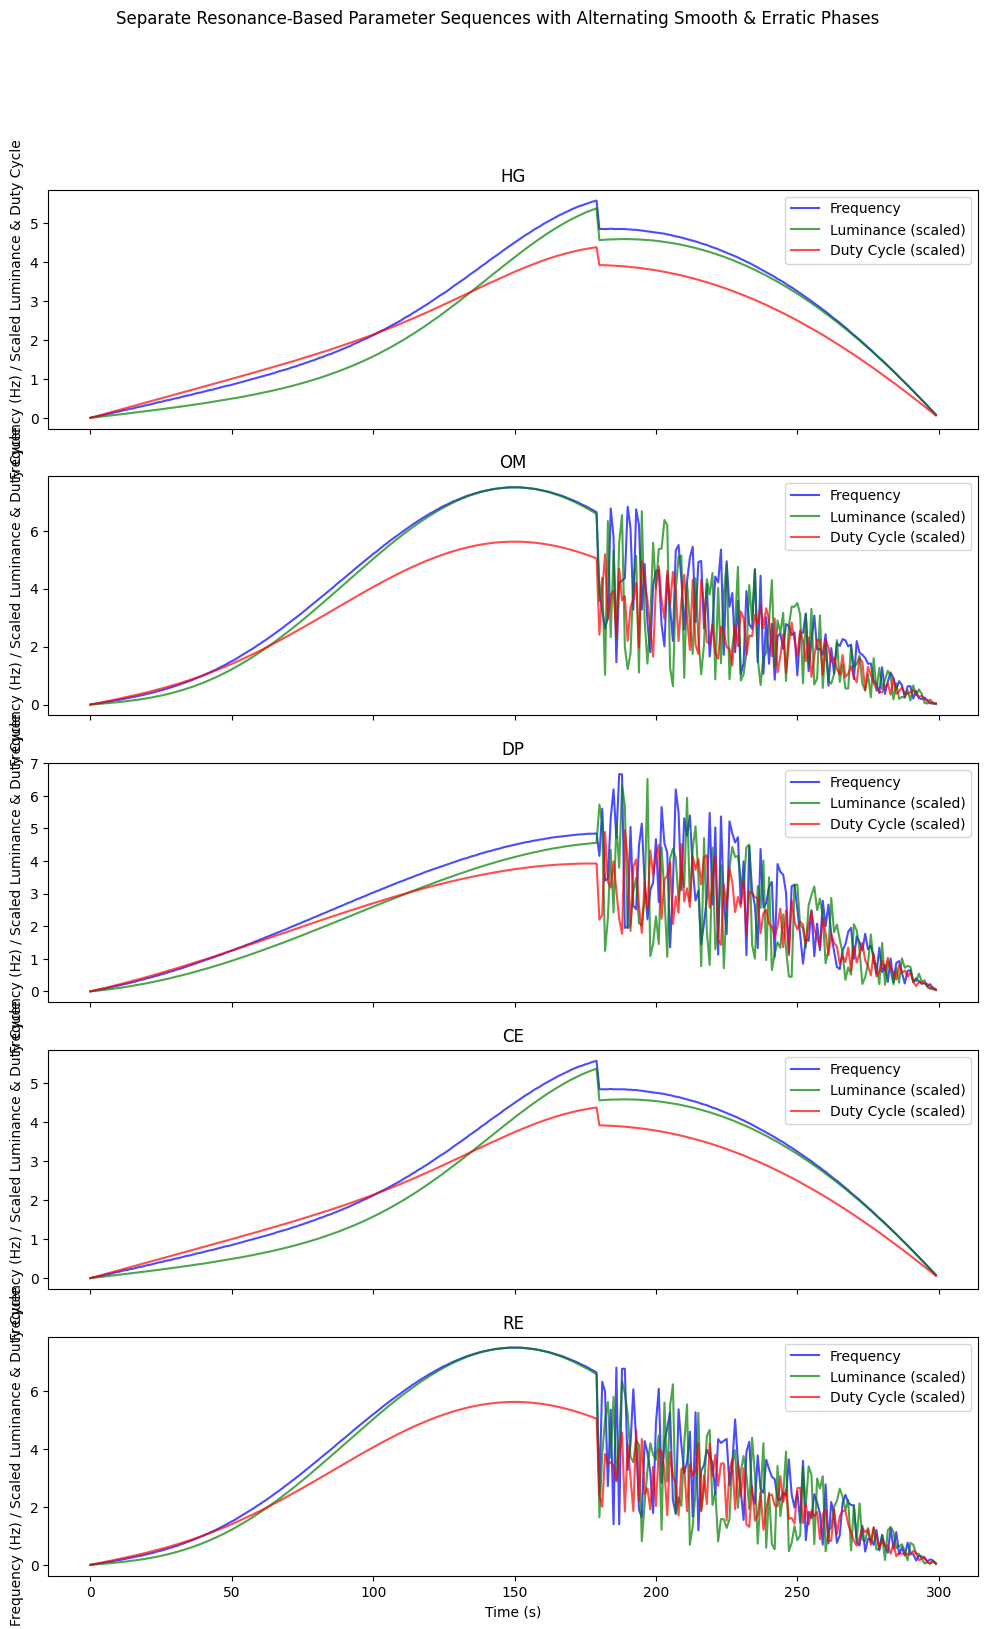

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Session parameters
session_duration = 300  # 5 minutes (300 seconds)
time_step = 1.0  # 1s resolution
num_steps = int(session_duration / time_step)

# Parameter constraints
frequency_range = (3, 15)  # Hz
luminance_range = (10, 100)  # Arbitrary units
duty_cycle_range = (25, 75)  # Percentage

# Function to alternate between smooth and erratic changes
def hybrid_transition(progress, min_val, max_val, mode, switch_point=0.5):
    if progress < switch_point:
        if mode == "smooth":
            return min_val + (max_val - min_val) * (1 / (1 + np.exp(-10 * (progress - 0.5))))
        elif mode == "mixed":
            return min_val + (max_val - min_val) * (np.sin(progress * np.pi) ** 2)
        else:
            return min_val + (max_val - min_val) * progress
    else:
        if mode in ["erratic", "mixed"]:
            return np.random.uniform(min_val, max_val)
        else:
            return min_val + (max_val - min_val) * progress

# Generate different resonance-based sequences with both smooth and erratic phases
def generate_sequence(mode):
    time = np.arange(0, session_duration, time_step)
    frequency = np.zeros(num_steps)
    luminance = np.zeros(num_steps)
    duty_cycle = np.zeros(num_steps)

    for i in range(num_steps):
        progress = i / num_steps
        fade_in = np.sin(progress * np.pi / 2)  # Smooth ramp-up
        fade_out = np.sin((1 - progress) * np.pi / 2)  # Smooth ramp-down
        switch_point = 0.6  # Defines when transition from smooth to erratic occurs

        if mode == "harmonic_glide":
            freq = hybrid_transition(progress, 3, 15, "smooth", switch_point) * fade_in * fade_out
            lum = hybrid_transition(progress, 10, 100, "smooth", switch_point) * fade_in * fade_out
            duty = hybrid_transition(progress, 25, 75, "smooth", switch_point) * fade_in * fade_out
        elif mode == "oscillatory_mode":
            freq = hybrid_transition(progress, 3, 15, "mixed", switch_point) * fade_in * fade_out
            lum = hybrid_transition(progress, 10, 100, "mixed", switch_point) * fade_in * fade_out
            duty = hybrid_transition(progress, 25, 75, "mixed", switch_point) * fade_in * fade_out
        elif mode == "divergent_pattern":
            freq = hybrid_transition(progress, 3, 15, "erratic", switch_point) * fade_in * fade_out
            lum = hybrid_transition(progress, 10, 100, "erratic", switch_point) * fade_in * fade_out
            duty = hybrid_transition(progress, 25, 75, "erratic", switch_point) * fade_in * fade_out
        elif mode == "chirped_excitation":
            freq = hybrid_transition(progress, 3, 15, "smooth", switch_point) * fade_in * fade_out
            lum = hybrid_transition(progress, 10, 100, "smooth", switch_point) * fade_in * fade_out
            duty = hybrid_transition(progress, 25, 75, "smooth", switch_point) * fade_in * fade_out
        elif mode == "randomized_exploration":
            freq = hybrid_transition(progress, 3, 15, "mixed", switch_point) * fade_in * fade_out
            lum = hybrid_transition(progress, 10, 100, "mixed", switch_point) * fade_in * fade_out
            duty = hybrid_transition(progress, 25, 75, "mixed", switch_point) * fade_in * fade_out

        frequency[i] = round(freq, 2)
        luminance[i] = round(lum, 2)
        duty_cycle[i] = round(duty, 2)

    return pd.DataFrame({
        "Time (s)": time.astype(int),
        "Frequency (Hz)": frequency,
        "Luminance": luminance,
        "Duty Cycle (%)": duty_cycle
    })

# Generate all sequences
base_sequences = {
    "HG": generate_sequence("harmonic_glide"),
    "OM": generate_sequence("oscillatory_mode"),
    "DP": generate_sequence("divergent_pattern"),
    "CE": generate_sequence("chirped_excitation"),
    "RE": generate_sequence("randomized_exploration"),
}

# Create separate plots for each sequence
fig, axes = plt.subplots(5, 1, figsize=(12, 18), sharex=True)

colors = {
    "Frequency": "blue",
    "Luminance": "green",
    "Duty Cycle (%)": "red"
}

for ax, (mode, df) in zip(axes, base_sequences.items()):
    ax.plot(df["Time (s)"], df["Frequency (Hz)"], label="Frequency", color=colors["Frequency"], alpha=0.7)
    ax.plot(df["Time (s)"], df["Luminance"] / 100 * 15, label="Luminance (scaled)", color=colors["Luminance"], alpha=0.7)
    ax.plot(df["Time (s)"], df["Duty Cycle (%)"] / 100 * 15, label="Duty Cycle (scaled)", color=colors["Duty Cycle (%)"], alpha=0.7)
    ax.set_ylabel("Frequency (Hz) / Scaled Luminance & Duty Cycle")
    ax.set_title(mode)
    ax.legend()

plt.xlabel("Time (s)")
plt.suptitle("Separate Resonance-Based Parameter Sequences with Alternating Smooth & Erratic Phases")
plt.show()



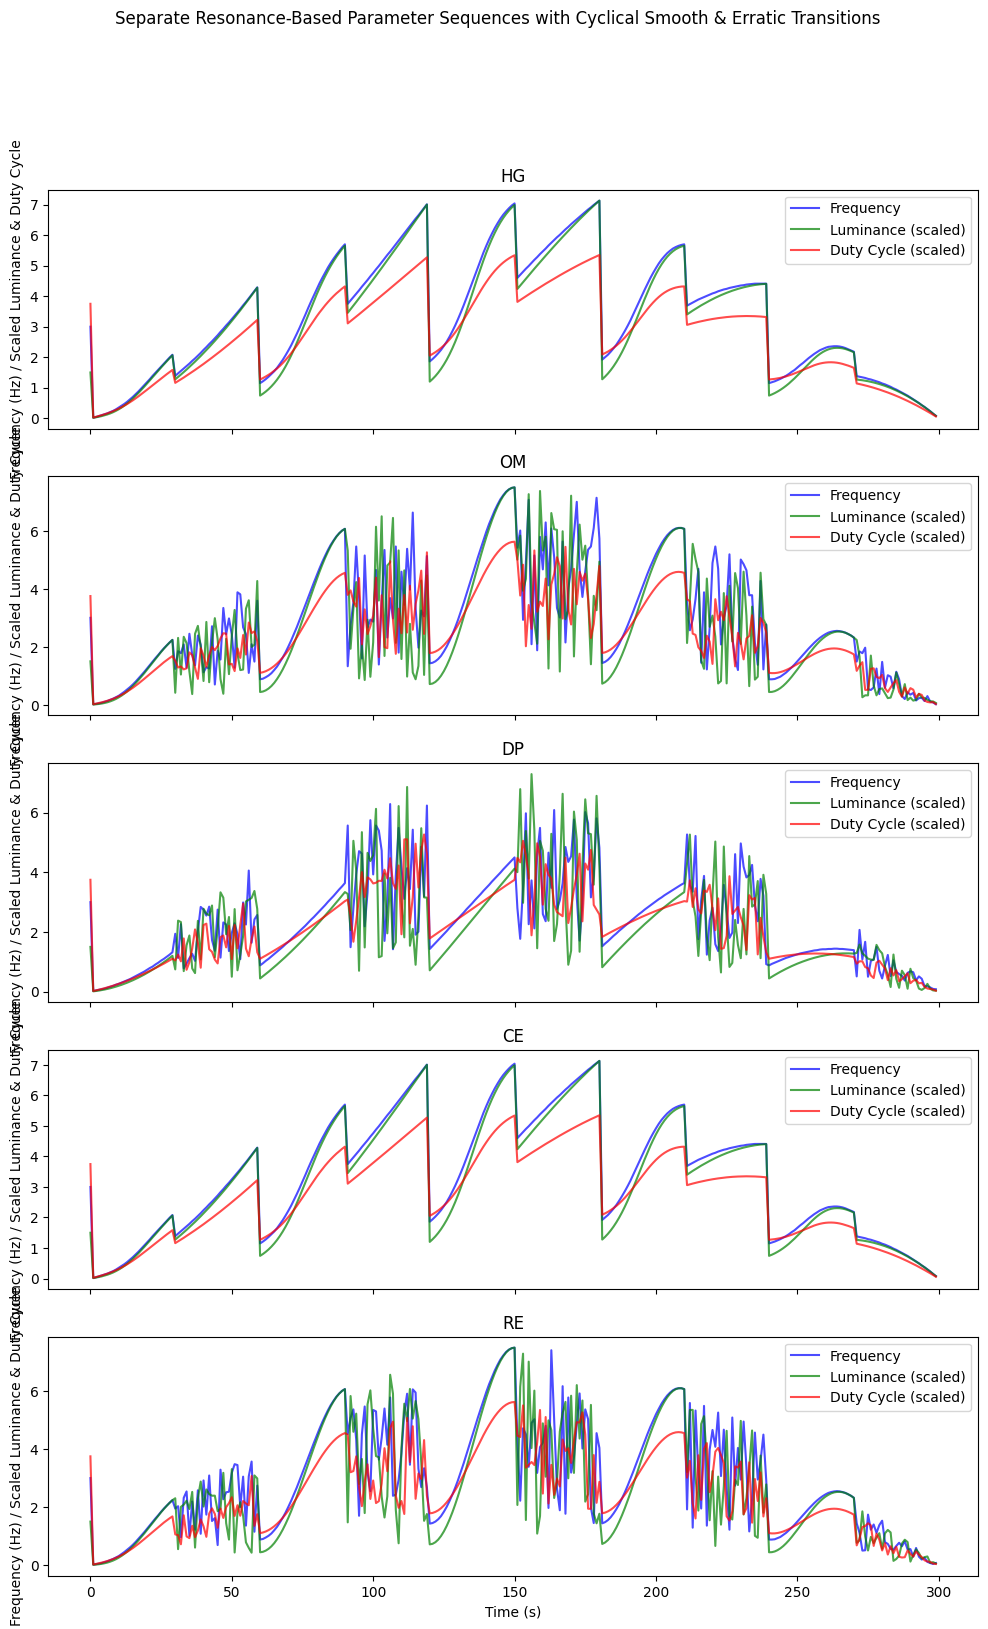

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Session parameters
session_duration = 300  # 5 minutes (300 seconds)
time_step = 1.0  # 1s resolution
num_steps = int(session_duration / time_step)

# Parameter constraints
frequency_range = (3, 15)  # Hz
luminance_range = (10, 100)  # Arbitrary units
duty_cycle_range = (25, 75)  # Percentage

# Function to alternate between smooth and erratic changes in a cyclical pattern
def hybrid_transition(progress, min_val, max_val, mode):
    cycle_period = 0.2  # Defines how often transitions occur
    cycle_phase = (progress % cycle_period) / cycle_period

    if cycle_phase < 0.5:
        if mode == "smooth":
            return min_val + (max_val - min_val) * (1 / (1 + np.exp(-10 * (cycle_phase - 0.25))))
        elif mode == "mixed":
            return min_val + (max_val - min_val) * (np.sin(cycle_phase * np.pi) ** 2)
        else:
            return min_val + (max_val - min_val) * cycle_phase
    elif mode in ["erratic", "mixed"]:
        return np.random.uniform(min_val, max_val)
    else:
        return min_val + (max_val - min_val) * cycle_phase

# Generate different resonance-based sequences with alternating smooth and erratic bursts
def generate_sequence(mode):
    time = np.arange(0, session_duration, time_step)
    frequency = np.zeros(num_steps)
    luminance = np.zeros(num_steps)
    duty_cycle = np.zeros(num_steps)

    for i in range(num_steps):
        progress = i / num_steps
        fade_in = np.sin(progress * np.pi / 2)  # Smooth ramp-up
        fade_out = np.sin((1 - progress) * np.pi / 2)  # Smooth ramp-down

        if mode == "harmonic_glide":
            freq = hybrid_transition(progress, 3, 15, "smooth") * fade_in * fade_out or 3
            lum = hybrid_transition(progress, 10, 100, "smooth") * fade_in * fade_out or 10
            duty = hybrid_transition(progress, 25, 75, "smooth") * fade_in * fade_out or 25
        elif mode == "oscillatory_mode":
            freq = hybrid_transition(progress, 3, 15, "mixed") * fade_in * fade_out or 3
            lum = hybrid_transition(progress, 10, 100, "mixed") * fade_in * fade_out or 10
            duty = hybrid_transition(progress, 25, 75, "mixed") * fade_in * fade_out or 25
        elif mode == "divergent_pattern":
            freq = hybrid_transition(progress, 3, 15, "erratic") * fade_in * fade_out or 3
            lum = hybrid_transition(progress, 10, 100, "erratic") * fade_in * fade_out or 10
            duty = hybrid_transition(progress, 25, 75, "erratic") * fade_in * fade_out or 25
        elif mode == "chirped_excitation":
            freq = hybrid_transition(progress, 3, 15, "smooth") * fade_in * fade_out or 3
            lum = hybrid_transition(progress, 10, 100, "smooth") * fade_in * fade_out or 10
            duty = hybrid_transition(progress, 25, 75, "smooth") * fade_in * fade_out or 25
        elif mode == "randomized_exploration":
            freq = hybrid_transition(progress, 3, 15, "mixed") * fade_in * fade_out or 3
            lum = hybrid_transition(progress, 10, 100, "mixed") * fade_in * fade_out or 10
            duty = hybrid_transition(progress, 25, 75, "mixed") * fade_in * fade_out or 25

        frequency[i] = round(freq, 2)
        luminance[i] = round(lum, 2)
        duty_cycle[i] = round(duty, 2)

    return pd.DataFrame({
        "Time (s)": time.astype(int),
        "Frequency (Hz)": frequency,
        "Luminance": luminance,
        "Duty Cycle (%)": duty_cycle
    })

# Generate all sequences
base_sequences = {
    "HG": generate_sequence("harmonic_glide"),
    "OM": generate_sequence("oscillatory_mode"),
    "DP": generate_sequence("divergent_pattern"),
    "CE": generate_sequence("chirped_excitation"),
    "RE": generate_sequence("randomized_exploration"),
}

# Create separate plots for each sequence
fig, axes = plt.subplots(5, 1, figsize=(12, 18), sharex=True)

colors = {
    "Frequency": "blue",
    "Luminance": "green",
    "Duty Cycle (%)": "red"
}

for ax, (mode, df) in zip(axes, base_sequences.items()):
    ax.plot(df["Time (s)"], df["Frequency (Hz)"], label="Frequency", color=colors["Frequency"], alpha=0.7)
    ax.plot(df["Time (s)"], df["Luminance"] / 100 * 15, label="Luminance (scaled)", color=colors["Luminance"], alpha=0.7)
    ax.plot(df["Time (s)"], df["Duty Cycle (%)"] / 100 * 15, label="Duty Cycle (scaled)", color=colors["Duty Cycle (%)"], alpha=0.7)
    ax.set_ylabel("Frequency (Hz) / Scaled Luminance & Duty Cycle")
    ax.set_title(mode)
    ax.legend()

plt.xlabel("Time (s)")
plt.suptitle("Separate Resonance-Based Parameter Sequences with Cyclical Smooth & Erratic Transitions")
plt.show()


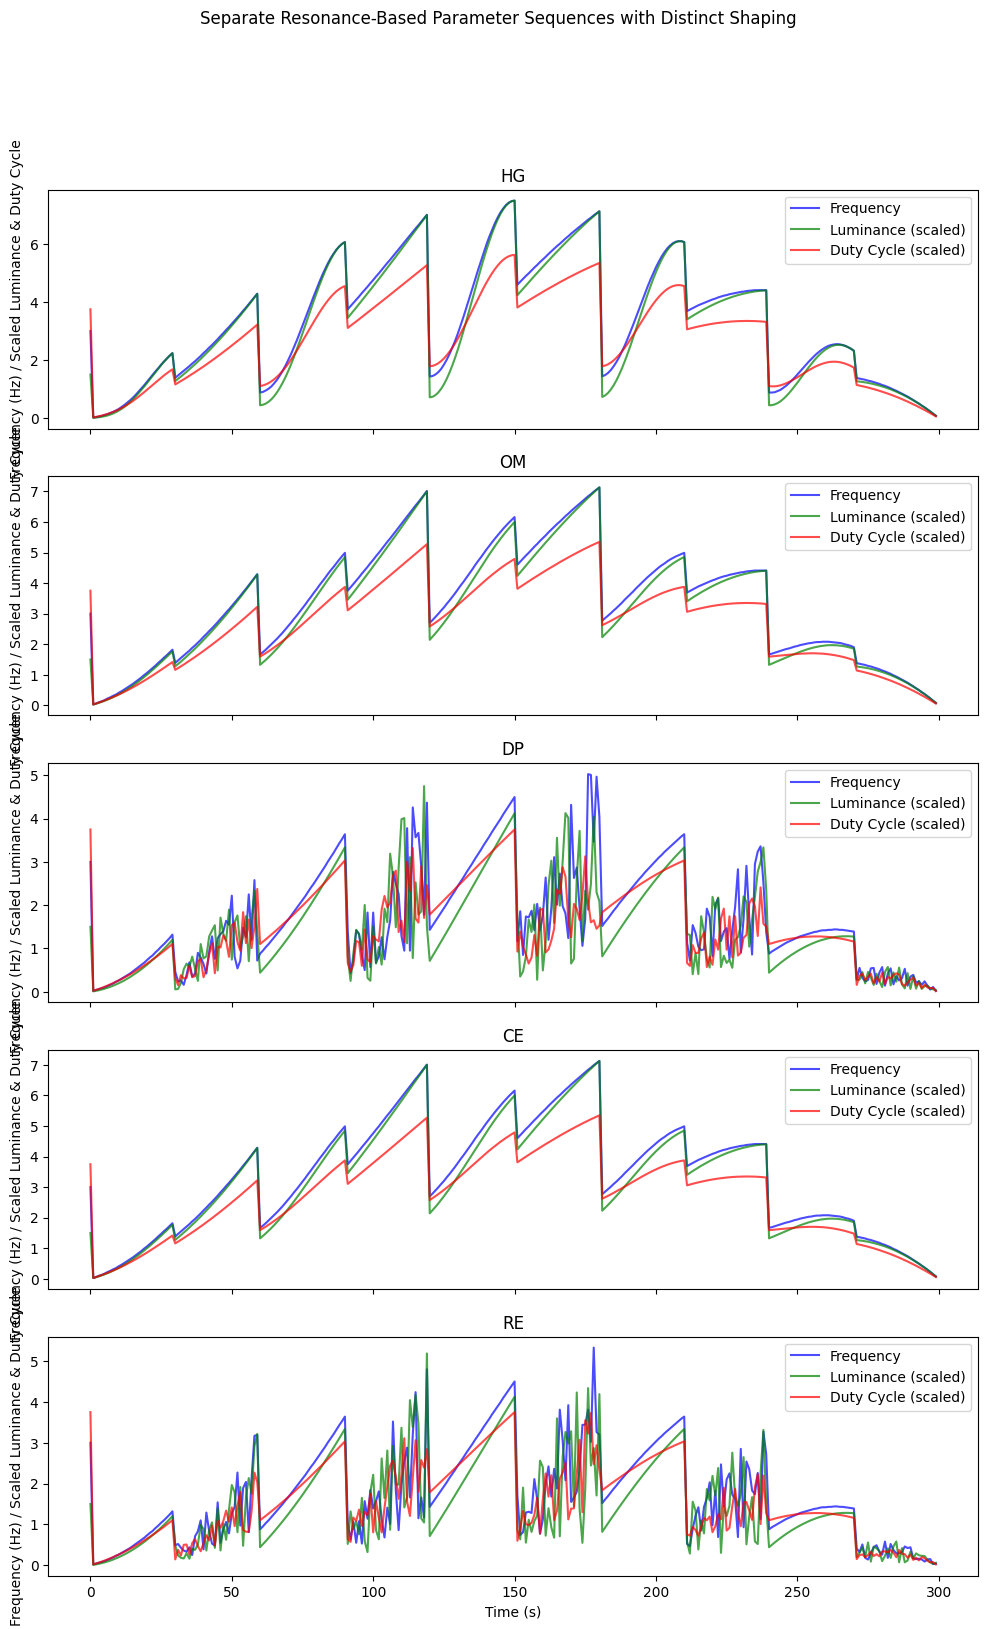

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Session parameters
session_duration = 300  # 5 minutes (300 seconds)
time_step = 1.0  # 1s resolution
num_steps = int(session_duration / time_step)

# Parameter constraints
frequency_range = (3, 15)  # Hz
luminance_range = (10, 100)  # Arbitrary units
duty_cycle_range = (25, 75)  # Percentage

# Function to cycle between smooth and erratic transitions with improved structure
def hybrid_transition(progress, min_val, max_val, mode):
    cycle_period = 0.2  # Defines how often transitions occur
    cycle_phase = (progress % cycle_period) / cycle_period
    transition_smoothness = 5  # Controls the gradual introduction of noise

    if cycle_phase < 0.5:
        if mode == "smooth":
            return min_val + (max_val - min_val) * (1 / (1 + np.exp(-transition_smoothness * (cycle_phase - 0.25))))
        elif mode == "harmonic":
            return min_val + (max_val - min_val) * (np.sin(cycle_phase * np.pi) ** 2)
        else:
            return min_val + (max_val - min_val) * cycle_phase
    elif mode in ["erratic", "mixed"]:
        return np.random.uniform(min_val, max_val) * (1 / (1 + np.exp(-transition_smoothness * (cycle_phase - 0.75))))
    else:
        return min_val + (max_val - min_val) * cycle_phase

# Generate different resonance-based sequences with distinct dynamics
def generate_sequence(mode):
    time = np.arange(0, session_duration, time_step)
    frequency = np.zeros(num_steps)
    luminance = np.zeros(num_steps)
    duty_cycle = np.zeros(num_steps)

    for i in range(num_steps):
        progress = i / num_steps
        fade_in = np.sin(progress * np.pi / 2)  # Smooth ramp-up
        fade_out = np.sin((1 - progress) * np.pi / 2)  # Smooth ramp-down

        if mode == "harmonic_glide":
            freq = hybrid_transition(progress, 3, 15, "harmonic") * fade_in * fade_out or 3
            lum = hybrid_transition(progress, 10, 100, "harmonic") * fade_in * fade_out or 10
            duty = hybrid_transition(progress, 25, 75, "harmonic") * fade_in * fade_out or 25
        elif mode == "oscillatory_mode":
            freq = hybrid_transition(progress, 3, 15, "smooth") * fade_in * fade_out or 3
            lum = hybrid_transition(progress, 10, 100, "smooth") * fade_in * fade_out or 10
            duty = hybrid_transition(progress, 25, 75, "smooth") * fade_in * fade_out or 25
        elif mode == "divergent_pattern":
            freq = hybrid_transition(progress, 3, 15, "erratic") * fade_in * fade_out or 3
            lum = hybrid_transition(progress, 10, 100, "erratic") * fade_in * fade_out or 10
            duty = hybrid_transition(progress, 25, 75, "erratic") * fade_in * fade_out or 25
        elif mode == "chirped_excitation":
            freq = hybrid_transition(progress, 3, 15, "smooth") * fade_in * fade_out or 3
            lum = hybrid_transition(progress, 10, 100, "smooth") * fade_in * fade_out or 10
            duty = hybrid_transition(progress, 25, 75, "smooth") * fade_in * fade_out or 25
        elif mode == "randomized_exploration":
            freq = hybrid_transition(progress, 3, 15, "mixed") * fade_in * fade_out or 3
            lum = hybrid_transition(progress, 10, 100, "mixed") * fade_in * fade_out or 10
            duty = hybrid_transition(progress, 25, 75, "mixed") * fade_in * fade_out or 25

        frequency[i] = round(freq, 2)
        luminance[i] = round(lum, 2)
        duty_cycle[i] = round(duty, 2)

    return pd.DataFrame({
        "Time (s)": time.astype(int),
        "Frequency (Hz)": frequency,
        "Luminance": luminance,
        "Duty Cycle (%)": duty_cycle
    })

# Generate all sequences
base_sequences = {
    "HG": generate_sequence("harmonic_glide"),
    "OM": generate_sequence("oscillatory_mode"),
    "DP": generate_sequence("divergent_pattern"),
    "CE": generate_sequence("chirped_excitation"),
    "RE": generate_sequence("randomized_exploration"),
}

# Create separate plots for each sequence
fig, axes = plt.subplots(5, 1, figsize=(12, 18), sharex=True)

colors = {
    "Frequency": "blue",
    "Luminance": "green",
    "Duty Cycle (%)": "red"
}

for ax, (mode, df) in zip(axes, base_sequences.items()):
    ax.plot(df["Time (s)"], df["Frequency (Hz)"], label="Frequency", color=colors["Frequency"], alpha=0.7)
    ax.plot(df["Time (s)"], df["Luminance"] / 100 * 15, label="Luminance (scaled)", color=colors["Luminance"], alpha=0.7)
    ax.plot(df["Time (s)"], df["Duty Cycle (%)"] / 100 * 15, label="Duty Cycle (scaled)", color=colors["Duty Cycle (%)"], alpha=0.7)
    ax.set_ylabel("Frequency (Hz) / Scaled Luminance & Duty Cycle")
    ax.set_title(mode)
    ax.legend()

plt.xlabel("Time (s)")
plt.suptitle("Separate Resonance-Based Parameter Sequences with Distinct Shaping")
plt.show()


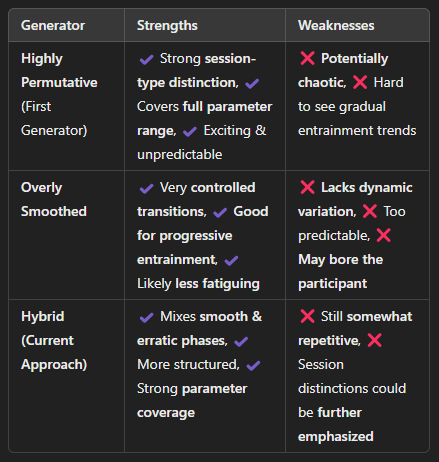

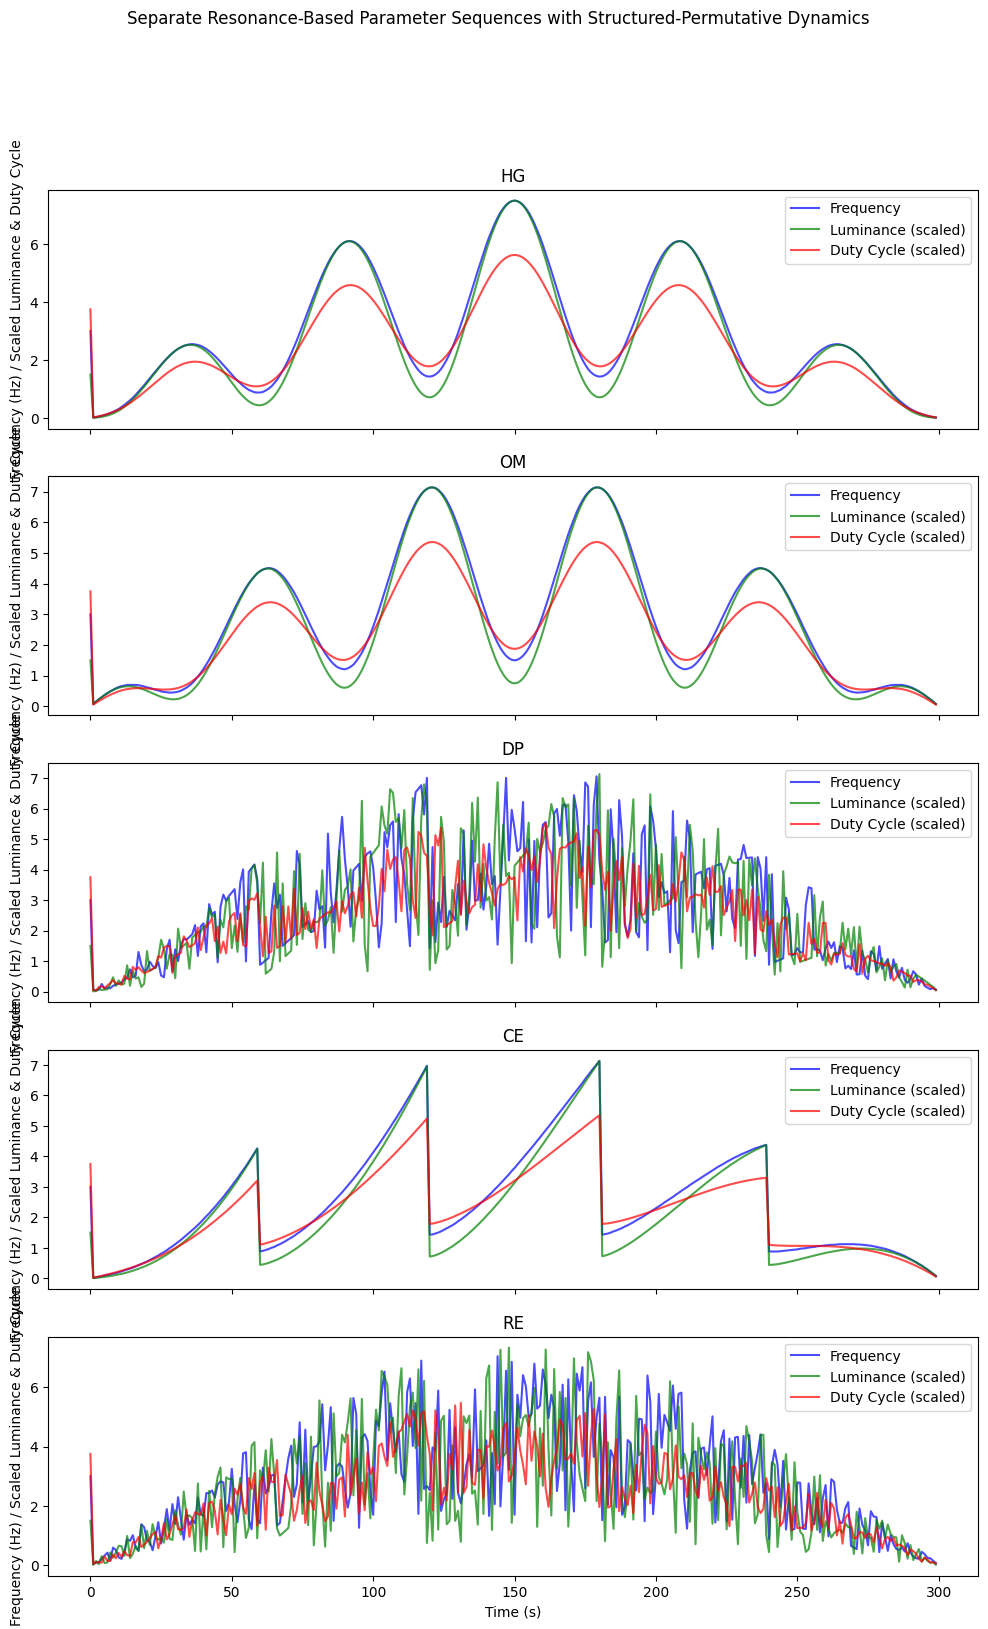

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Session parameters
session_duration = 300  # 5 minutes (300 seconds)
time_step = 1.0  # 1s resolution
num_steps = int(session_duration / time_step)

# Parameter constraints
frequency_range = (3, 15)  # Hz
luminance_range = (10, 100)  # Arbitrary units
duty_cycle_range = (25, 75)  # Percentage

# Function to create structured-permutative transitions
def structured_permutative_transition(progress, min_val, max_val, mode):
    cycle_period = 0.2  # Defines structured oscillation period
    cycle_phase = (progress % cycle_period) / cycle_period
    transition_smoothness = 5  # Controls how gradually randomness is introduced

    if mode == "harmonic":
        return min_val + (max_val - min_val) * (np.sin(cycle_phase * np.pi) ** 2)
    elif mode == "oscillatory":
        return min_val + (max_val - min_val) * (0.5 + 0.5 * np.cos(2 * np.pi * cycle_phase))
    elif mode == "divergent":
        return np.random.uniform(min_val, max_val) if np.random.rand() < 0.6 else min_val + (max_val - min_val) * cycle_phase
    elif mode == "chirped":
        return min_val + (max_val - min_val) * (cycle_phase ** 1.5)  # Nonlinear acceleration
    elif mode == "randomized":
        return np.random.uniform(min_val, max_val) if np.random.rand() < 0.8 else min_val + (max_val - min_val) * cycle_phase
    else:
        return min_val + (max_val - min_val) * cycle_phase

# Generate different resonance-based sequences with improved session differentiation
def generate_sequence(mode):
    time = np.arange(0, session_duration, time_step)
    frequency = np.zeros(num_steps)
    luminance = np.zeros(num_steps)
    duty_cycle = np.zeros(num_steps)

    for i in range(num_steps):
        progress = i / num_steps
        fade_in = np.sin(progress * np.pi / 2)  # Smooth ramp-up
        fade_out = np.sin((1 - progress) * np.pi / 2)  # Smooth ramp-down

        if mode == "harmonic_glide":
            freq = structured_permutative_transition(progress, 3, 15, "harmonic") * fade_in * fade_out or 3
            lum = structured_permutative_transition(progress, 10, 100, "harmonic") * fade_in * fade_out or 10
            duty = structured_permutative_transition(progress, 25, 75, "harmonic") * fade_in * fade_out or 25
        elif mode == "oscillatory_mode":
            freq = structured_permutative_transition(progress, 3, 15, "oscillatory") * fade_in * fade_out or 3
            lum = structured_permutative_transition(progress, 10, 100, "oscillatory") * fade_in * fade_out or 10
            duty = structured_permutative_transition(progress, 25, 75, "oscillatory") * fade_in * fade_out or 25
        elif mode == "divergent_pattern":
            freq = structured_permutative_transition(progress, 3, 15, "divergent") * fade_in * fade_out or 3
            lum = structured_permutative_transition(progress, 10, 100, "divergent") * fade_in * fade_out or 10
            duty = structured_permutative_transition(progress, 25, 75, "divergent") * fade_in * fade_out or 25
        elif mode == "chirped_excitation":
            freq = structured_permutative_transition(progress, 3, 15, "chirped") * fade_in * fade_out or 3
            lum = structured_permutative_transition(progress, 10, 100, "chirped") * fade_in * fade_out or 10
            duty = structured_permutative_transition(progress, 25, 75, "chirped") * fade_in * fade_out or 25
        elif mode == "randomized_exploration":
            freq = structured_permutative_transition(progress, 3, 15, "randomized") * fade_in * fade_out or 3
            lum = structured_permutative_transition(progress, 10, 100, "randomized") * fade_in * fade_out or 10
            duty = structured_permutative_transition(progress, 25, 75, "randomized") * fade_in * fade_out or 25

        frequency[i] = round(freq, 2)
        luminance[i] = round(lum, 2)
        duty_cycle[i] = round(duty, 2)

    return pd.DataFrame({
        "Time (s)": time.astype(int),
        "Frequency (Hz)": frequency,
        "Luminance": luminance,
        "Duty Cycle (%)": duty_cycle
    })

# Generate all sequences
base_sequences = {
    "HG": generate_sequence("harmonic_glide"),
    "OM": generate_sequence("oscillatory_mode"),
    "DP": generate_sequence("divergent_pattern"),
    "CE": generate_sequence("chirped_excitation"),
    "RE": generate_sequence("randomized_exploration"),
}

# Create separate plots for each sequence
fig, axes = plt.subplots(5, 1, figsize=(12, 18), sharex=True)

colors = {
    "Frequency": "blue",
    "Luminance": "green",
    "Duty Cycle (%)": "red"
}

for ax, (mode, df) in zip(axes, base_sequences.items()):
    ax.plot(df["Time (s)"], df["Frequency (Hz)"], label="Frequency", color=colors["Frequency"], alpha=0.7)
    ax.plot(df["Time (s)"], df["Luminance"] / 100 * 15, label="Luminance (scaled)", color=colors["Luminance"], alpha=0.7)
    ax.plot(df["Time (s)"], df["Duty Cycle (%)"] / 100 * 15, label="Duty Cycle (scaled)", color=colors["Duty Cycle (%)"], alpha=0.7)
    ax.set_ylabel("Frequency (Hz) / Scaled Luminance & Duty Cycle")
    ax.set_title(mode)
    ax.legend()

plt.xlabel("Time (s)")
plt.suptitle("Separate Resonance-Based Parameter Sequences with Structured-Permutative Dynamics")
plt.show()

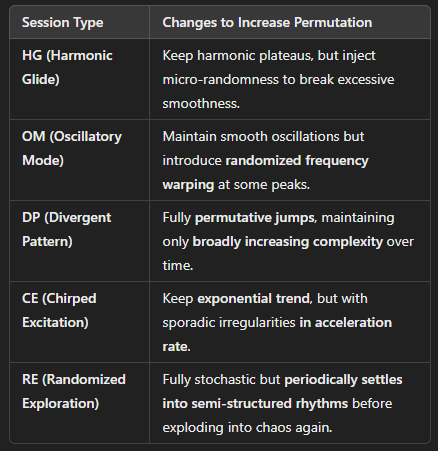

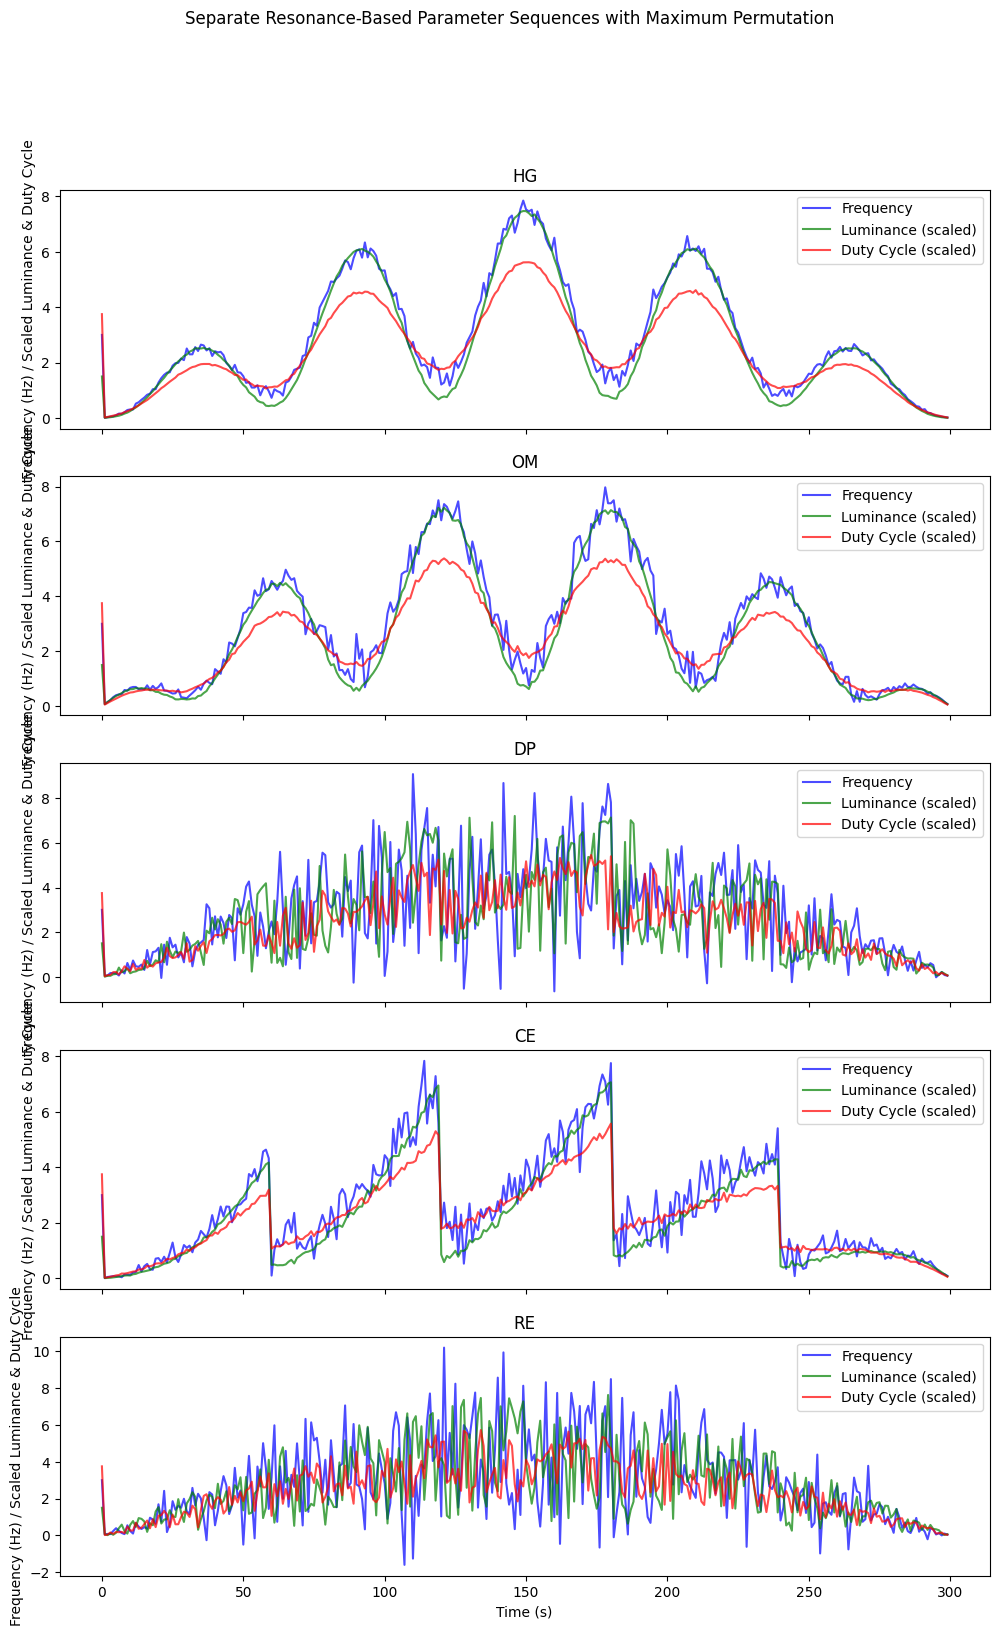

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Session parameters
session_duration = 300  # 5 minutes (300 seconds)
time_step = 1.0  # 1s resolution
num_steps = int(session_duration / time_step)

# Parameter constraints
frequency_range = (3, 15)  # Hz
luminance_range = (10, 100)  # Arbitrary units
duty_cycle_range = (25, 75)  # Percentage

# Function to introduce structured permutation with noise
def structured_permutative_transition(progress, min_val, max_val, mode):
    cycle_period = 0.2  # Defines structured oscillation period
    cycle_phase = (progress % cycle_period) / cycle_period
    transition_smoothness = 5  # Controls how gradually randomness is introduced
    noise_level = {
        "harmonic": 0.5,
        "oscillatory": 1.0,
        "divergent": 3.0,
        "chirped": 1.5,
        "randomized": 4.0
    }.get(mode, 1.0)
    noise = np.random.normal(0, noise_level)  # Inject randomness based on mode

    if mode == "harmonic":
        return min_val + (max_val - min_val) * (np.sin(cycle_phase * np.pi) ** 2) + noise
    elif mode == "oscillatory":
        return min_val + (max_val - min_val) * (0.5 + 0.5 * np.cos(2 * np.pi * cycle_phase)) + noise
    elif mode == "divergent":
        return (np.random.uniform(min_val, max_val) if np.random.rand() < 0.6 else min_val + (max_val - min_val) * cycle_phase) + noise
    elif mode == "chirped":
        return min_val + (max_val - min_val) * (cycle_phase ** 1.5) + noise
    elif mode == "randomized":
        return (np.random.uniform(min_val, max_val) if np.random.rand() < 0.8 else min_val + (max_val - min_val) * cycle_phase) + noise
    else:
        return min_val + (max_val - min_val) * cycle_phase + noise

# Generate different resonance-based sequences with improved permutation
def generate_sequence(mode):
    time = np.arange(0, session_duration, time_step)
    frequency = np.zeros(num_steps)
    luminance = np.zeros(num_steps)
    duty_cycle = np.zeros(num_steps)

    for i in range(num_steps):
        progress = i / num_steps
        fade_in = np.sin(progress * np.pi / 2)  # Smooth ramp-up
        fade_out = np.sin((1 - progress) * np.pi / 2)  # Smooth ramp-down

        if mode == "harmonic_glide":
            freq = structured_permutative_transition(progress, 3, 15, "harmonic") * fade_in * fade_out or 3
            lum = structured_permutative_transition(progress, 10, 100, "harmonic") * fade_in * fade_out or 10
            duty = structured_permutative_transition(progress, 25, 75, "harmonic") * fade_in * fade_out or 25
        elif mode == "oscillatory_mode":
            freq = structured_permutative_transition(progress, 3, 15, "oscillatory") * fade_in * fade_out or 3
            lum = structured_permutative_transition(progress, 10, 100, "oscillatory") * fade_in * fade_out or 10
            duty = structured_permutative_transition(progress, 25, 75, "oscillatory") * fade_in * fade_out or 25
        elif mode == "divergent_pattern":
            freq = structured_permutative_transition(progress, 3, 15, "divergent") * fade_in * fade_out or 3
            lum = structured_permutative_transition(progress, 10, 100, "divergent") * fade_in * fade_out or 10
            duty = structured_permutative_transition(progress, 25, 75, "divergent") * fade_in * fade_out or 25
        elif mode == "chirped_excitation":
            freq = structured_permutative_transition(progress, 3, 15, "chirped") * fade_in * fade_out or 3
            lum = structured_permutative_transition(progress, 10, 100, "chirped") * fade_in * fade_out or 10
            duty = structured_permutative_transition(progress, 25, 75, "chirped") * fade_in * fade_out or 25
        elif mode == "randomized_exploration":
            freq = structured_permutative_transition(progress, 3, 15, "randomized") * fade_in * fade_out or 3
            lum = structured_permutative_transition(progress, 10, 100, "randomized") * fade_in * fade_out or 10
            duty = structured_permutative_transition(progress, 25, 75, "randomized") * fade_in * fade_out or 25

        frequency[i] = round(freq, 2)
        luminance[i] = round(lum, 2)
        duty_cycle[i] = round(duty, 2)

    return pd.DataFrame({
        "Time (s)": time.astype(int),
        "Frequency (Hz)": frequency,
        "Luminance": luminance,
        "Duty Cycle (%)": duty_cycle
    })

# Generate all sequences
base_sequences = {
    "HG": generate_sequence("harmonic_glide"),
    "OM": generate_sequence("oscillatory_mode"),
    "DP": generate_sequence("divergent_pattern"),
    "CE": generate_sequence("chirped_excitation"),
    "RE": generate_sequence("randomized_exploration"),
}

# Create separate plots for each sequence
fig, axes = plt.subplots(5, 1, figsize=(12, 18), sharex=True)

colors = {
    "Frequency": "blue",
    "Luminance": "green",
    "Duty Cycle (%)": "red"
}

for ax, (mode, df) in zip(axes, base_sequences.items()):
    ax.plot(df["Time (s)"], df["Frequency (Hz)"], label="Frequency", color=colors["Frequency"], alpha=0.7)
    ax.plot(df["Time (s)"], df["Luminance"] / 100 * 15, label="Luminance (scaled)", color=colors["Luminance"], alpha=0.7)
    ax.plot(df["Time (s)"], df["Duty Cycle (%)"] / 100 * 15, label="Duty Cycle (scaled)", color=colors["Duty Cycle (%)"], alpha=0.7)
    ax.set_ylabel("Frequency (Hz) / Scaled Luminance & Duty Cycle")
    ax.set_title(mode)
    ax.legend()

plt.xlabel("Time (s)")
plt.suptitle("Separate Resonance-Based Parameter Sequences with Maximum Permutation")
plt.show()

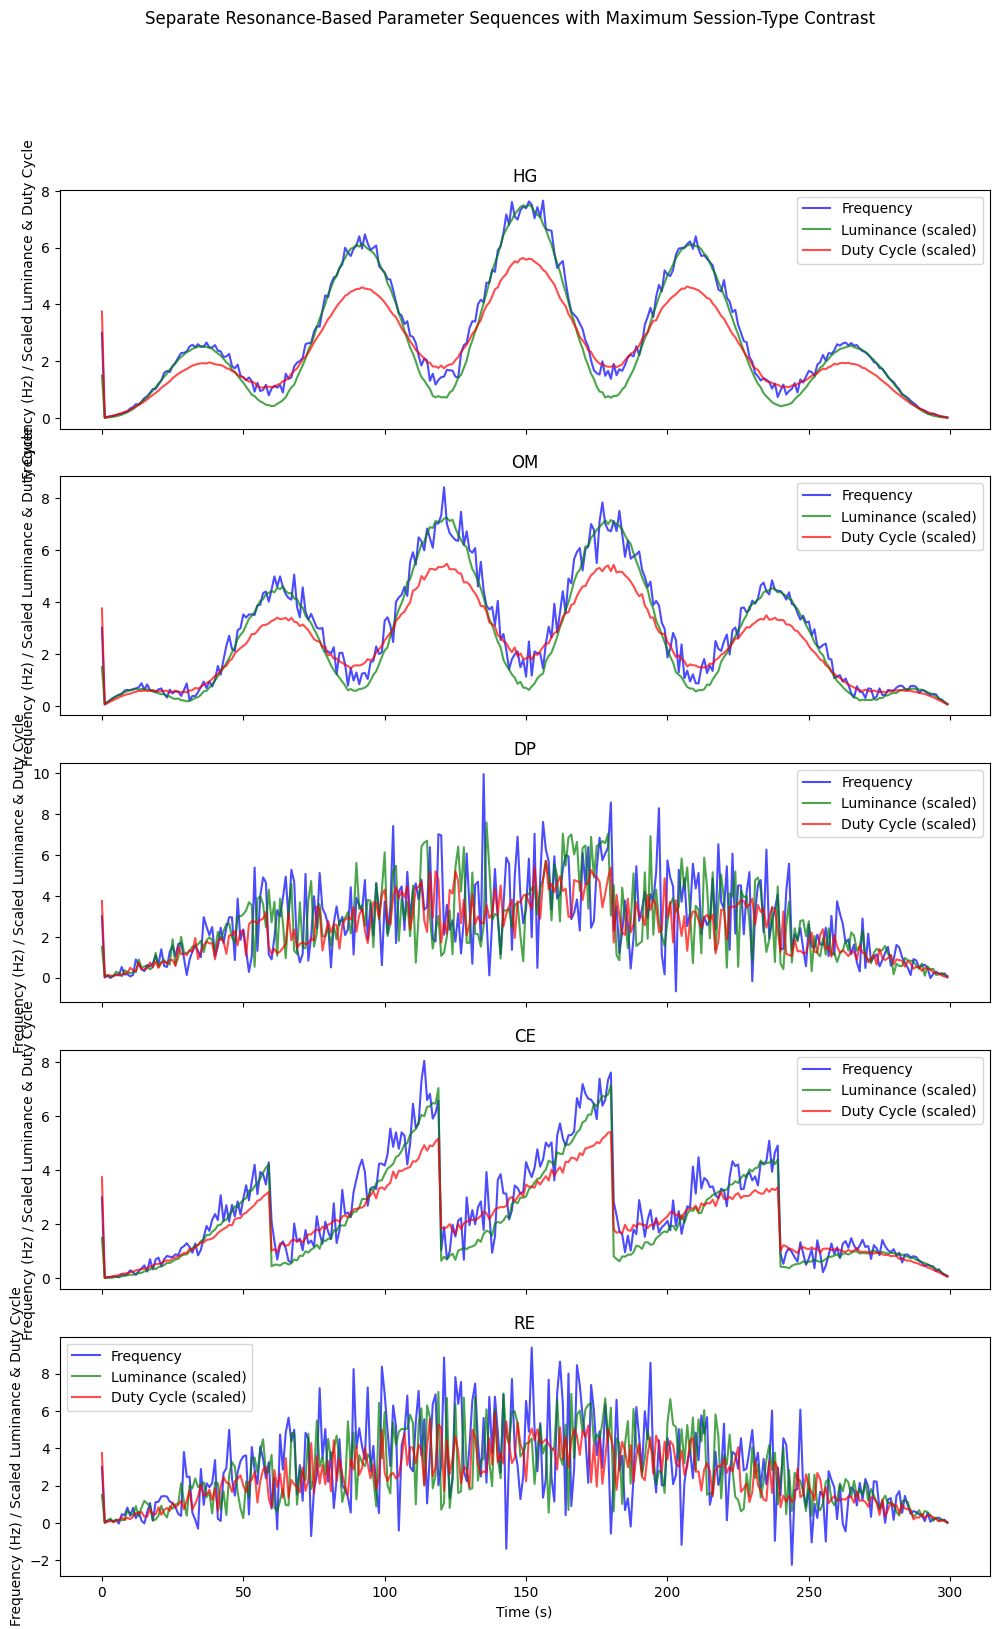

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Session parameters
session_duration = 300  # 5 minutes (300 seconds)
time_step = 1.0  # 1s resolution
num_steps = int(session_duration / time_step)

# Parameter constraints
frequency_range = (3, 15)  # Hz
luminance_range = (10, 100)  # Arbitrary units
duty_cycle_range = (25, 75)  # Percentage

# Function to enhance session-specific dynamics
def structured_permutative_transition(progress, min_val, max_val, mode):
    cycle_period = 0.2  # Defines structured oscillation period
    cycle_phase = (progress % cycle_period) / cycle_period
    transition_smoothness = 5  # Controls how gradually randomness is introduced
    noise_level = {
        "harmonic": 0.5,
        "oscillatory": 1.0,
        "divergent": 3.0,
        "chirped": 1.5,
        "randomized": 4.0
    }.get(mode, 1.0)
    noise = np.random.normal(0, noise_level)  # Inject randomness based on mode

    if mode == "harmonic":
        return min_val + (max_val - min_val) * (np.sin(cycle_phase * np.pi) ** 2) + noise
    elif mode == "oscillatory":
        return min_val + (max_val - min_val) * (0.5 + 0.5 * np.cos(2 * np.pi * cycle_phase)) + noise
    elif mode == "divergent":
        return (np.random.uniform(min_val, max_val) if np.random.rand() < 0.6 else min_val + (max_val - min_val) * cycle_phase) + noise
    elif mode == "chirped":
        return min_val + (max_val - min_val) * (cycle_phase ** 1.5) + noise
    elif mode == "randomized":
        return (np.random.uniform(min_val, max_val) if np.random.rand() < 0.8 else min_val + (max_val - min_val) * cycle_phase) + noise
    else:
        return min_val + (max_val - min_val) * cycle_phase + noise

# Generate distinct session-based sequences
def generate_sequence(mode):
    time = np.arange(0, session_duration, time_step)
    frequency = np.zeros(num_steps)
    luminance = np.zeros(num_steps)
    duty_cycle = np.zeros(num_steps)

    for i in range(num_steps):
        progress = i / num_steps
        fade_in = np.sin(progress * np.pi / 2)  # Smooth ramp-up
        fade_out = np.sin((1 - progress) * np.pi / 2)  # Smooth ramp-down

        if mode == "harmonic_glide":
            freq = structured_permutative_transition(progress, 3, 15, "harmonic") * fade_in * fade_out or 3
            lum = structured_permutative_transition(progress, 10, 100, "harmonic") * fade_in * fade_out or 10
            duty = structured_permutative_transition(progress, 25, 75, "harmonic") * fade_in * fade_out or 25
        elif mode == "oscillatory_mode":
            freq = structured_permutative_transition(progress, 3, 15, "oscillatory") * fade_in * fade_out or 3
            lum = structured_permutative_transition(progress, 10, 100, "oscillatory") * fade_in * fade_out or 10
            duty = structured_permutative_transition(progress, 25, 75, "oscillatory") * fade_in * fade_out or 25
        elif mode == "divergent_pattern":
            freq = structured_permutative_transition(progress, 3, 15, "divergent") * fade_in * fade_out or 3
            lum = structured_permutative_transition(progress, 10, 100, "divergent") * fade_in * fade_out or 10
            duty = structured_permutative_transition(progress, 25, 75, "divergent") * fade_in * fade_out or 25
        elif mode == "chirped_excitation":
            freq = structured_permutative_transition(progress, 3, 15, "chirped") * fade_in * fade_out or 3
            lum = structured_permutative_transition(progress, 10, 100, "chirped") * fade_in * fade_out or 10
            duty = structured_permutative_transition(progress, 25, 75, "chirped") * fade_in * fade_out or 25
        elif mode == "randomized_exploration":
            freq = structured_permutative_transition(progress, 3, 15, "randomized") * fade_in * fade_out or 3
            lum = structured_permutative_transition(progress, 10, 100, "randomized") * fade_in * fade_out or 10
            duty = structured_permutative_transition(progress, 25, 75, "randomized") * fade_in * fade_out or 25

        frequency[i] = round(freq, 2)
        luminance[i] = round(lum, 2)
        duty_cycle[i] = round(duty, 2)

    return pd.DataFrame({
        "Time (s)": time.astype(int),
        "Frequency (Hz)": frequency,
        "Luminance": luminance,
        "Duty Cycle (%)": duty_cycle
    })

# Generate distinct sequences for each session type
base_sequences = {
    "HG": generate_sequence("harmonic_glide"),
    "OM": generate_sequence("oscillatory_mode"),
    "DP": generate_sequence("divergent_pattern"),
    "CE": generate_sequence("chirped_excitation"),
    "RE": generate_sequence("randomized_exploration"),
}

# Create separate plots for each sequence
fig, axes = plt.subplots(5, 1, figsize=(12, 18), sharex=True)

colors = {
    "Frequency": "blue",
    "Luminance": "green",
    "Duty Cycle (%)": "red"
}

for ax, (mode, df) in zip(axes, base_sequences.items()):
    ax.plot(df["Time (s)"], df["Frequency (Hz)"], label="Frequency", color=colors["Frequency"], alpha=0.7)
    ax.plot(df["Time (s)"], df["Luminance"] / 100 * 15, label="Luminance (scaled)", color=colors["Luminance"], alpha=0.7)
    ax.plot(df["Time (s)"], df["Duty Cycle (%)"] / 100 * 15, label="Duty Cycle (scaled)", color=colors["Duty Cycle (%)"], alpha=0.7)
    ax.set_ylabel("Frequency (Hz) / Scaled Luminance & Duty Cycle")
    ax.set_title(mode)
    ax.legend()

plt.xlabel("Time (s)")
plt.suptitle("Separate Resonance-Based Parameter Sequences with Maximum Session-Type Contrast")
plt.show()

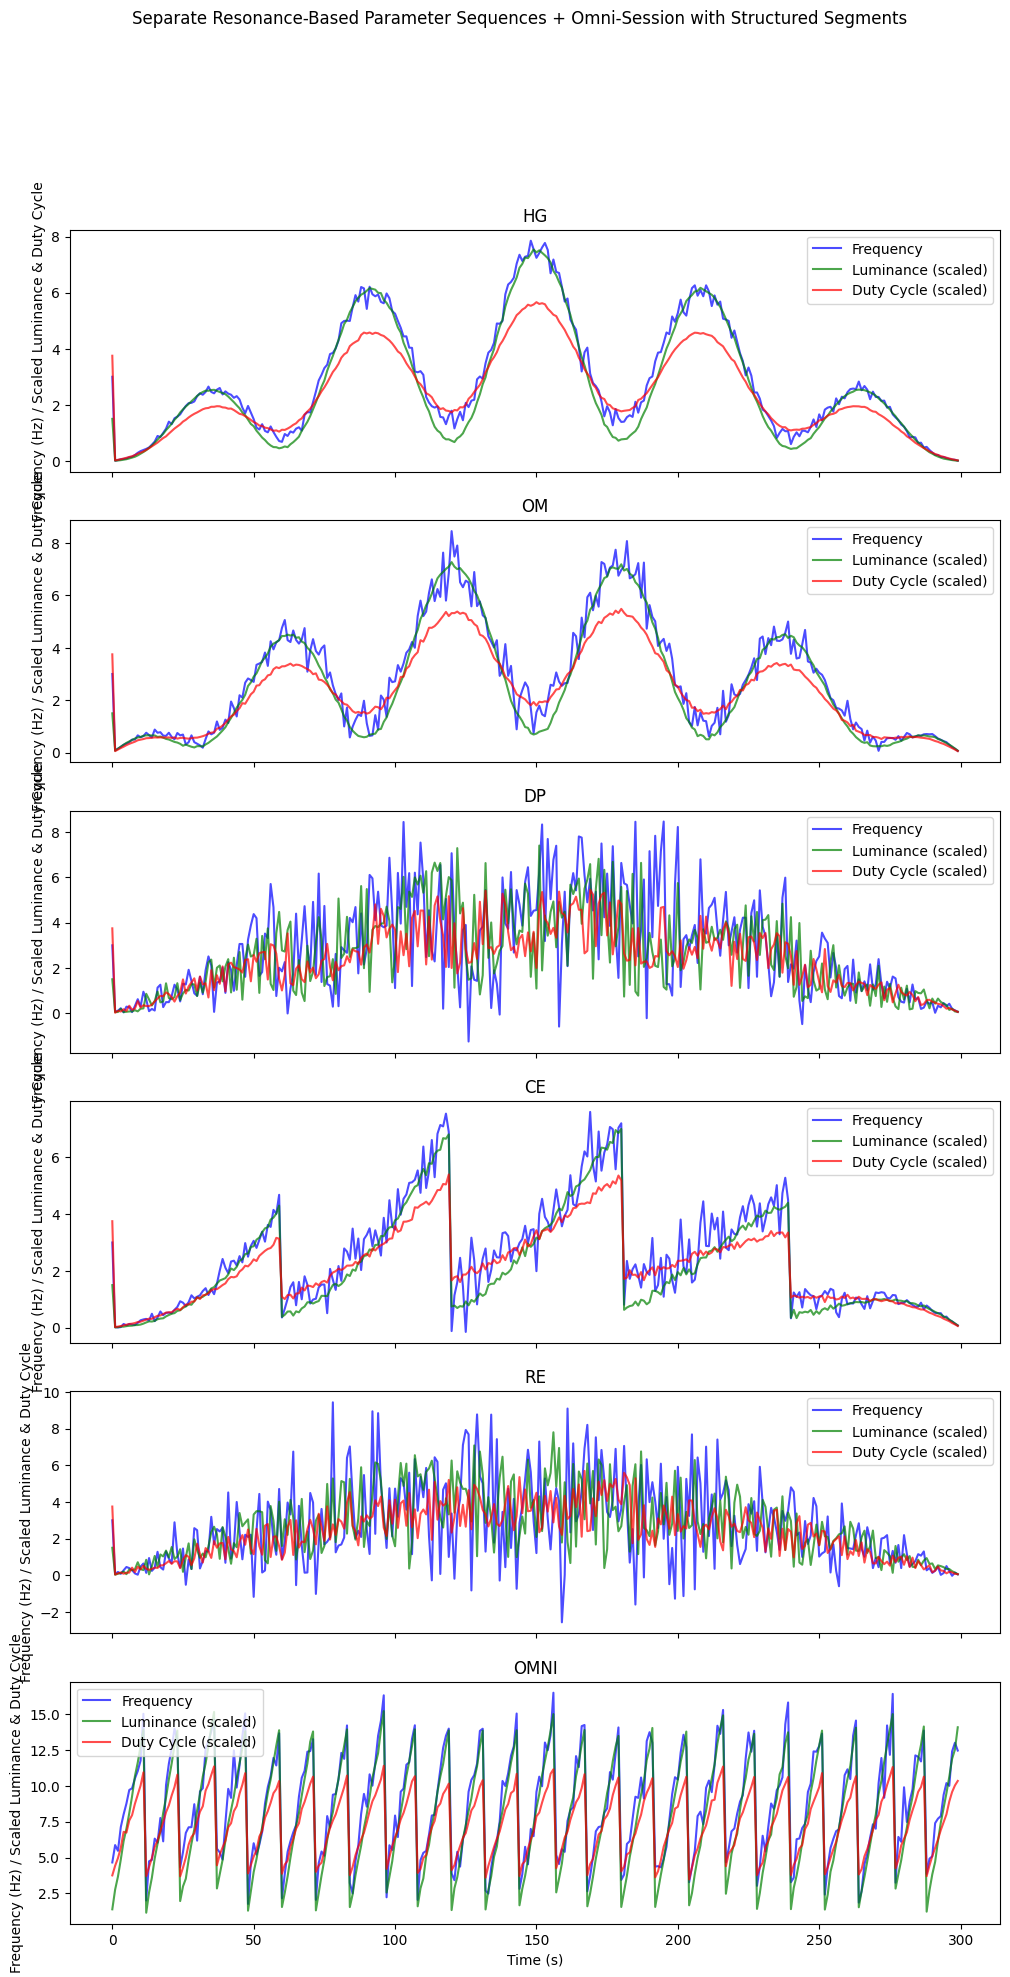

Saved: /content/HG_Sqz.txt
Saved: /content/OM_Sqz.txt
Saved: /content/DP_Sqz.txt
Saved: /content/CE_Sqz.txt
Saved: /content/RE_Sqz.txt
Saved: /content/OMNI_Sqz.txt


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Session parameters
session_duration = 300  # 5 minutes (300 seconds)
time_step = 1.0  # 1s resolution
num_steps = int(session_duration / time_step)

# Parameter constraints
frequency_range = (3, 15)  # Hz
luminance_range = (10, 100)  # Arbitrary units
duty_cycle_range = (25, 75)  # Percentage

# Define session transition points
session_segments = {
    "HG": (0, 60),
    "OM": (60, 120),
    "DP": (120, 180),
    "CE": (180, 240),
    "RE": (240, 300)
}

# Function to generate structured session transitions
def structured_permutative_transition(progress, min_val, max_val, mode):
    cycle_period = 0.2  # Defines structured oscillation period
    cycle_phase = (progress % cycle_period) / cycle_period
    transition_smoothness = 5  # Controls how gradually randomness is introduced
    noise_level = {
        "harmonic": 0.5,
        "oscillatory": 1.0,
        "divergent": 3.0,
        "chirped": 1.5,
        "randomized": 4.0
    }.get(mode, 1.0)
    noise = np.random.normal(0, noise_level)  # Inject randomness based on mode

    if mode == "harmonic":
        return min_val + (max_val - min_val) * (np.sin(cycle_phase * np.pi) ** 2) + noise
    elif mode == "oscillatory":
        return min_val + (max_val - min_val) * (0.5 + 0.5 * np.cos(2 * np.pi * cycle_phase)) + noise
    elif mode == "divergent":
        return (np.random.uniform(min_val, max_val) if np.random.rand() < 0.6 else min_val + (max_val - min_val) * cycle_phase) + noise
    elif mode == "chirped":
        return min_val + (max_val - min_val) * (cycle_phase ** 1.5) + noise
    elif mode == "randomized":
        return (np.random.uniform(min_val, max_val) if np.random.rand() < 0.8 else min_val + (max_val - min_val) * cycle_phase) + noise
    else:
        return min_val + (max_val - min_val) * cycle_phase + noise

# Generate distinct session-based sequences
def generate_sequence(mode):
    time = np.arange(0, session_duration, time_step)
    frequency = np.zeros(num_steps)
    luminance = np.zeros(num_steps)
    duty_cycle = np.zeros(num_steps)

    for i in range(num_steps):
        progress = i / num_steps
        fade_in = np.sin(progress * np.pi / 2)  # Smooth ramp-up
        fade_out = np.sin((1 - progress) * np.pi / 2)  # Smooth ramp-down

        freq = structured_permutative_transition(progress, 3, 15, mode) * fade_in * fade_out or 3
        lum = structured_permutative_transition(progress, 10, 100, mode) * fade_in * fade_out or 10
        duty = structured_permutative_transition(progress, 25, 75, mode) * fade_in * fade_out or 25

        frequency[i] = round(freq, 2)
        luminance[i] = round(lum, 2)
        duty_cycle[i] = round(duty, 2)

    return pd.DataFrame({
        "Time (s)": time.astype(int),
        "Frequency (Hz)": frequency,
        "Luminance": luminance,
        "Duty Cycle (%)": duty_cycle
    })

# Generate Omni-Session by stitching structured segments
def generate_omni_session():
    time = np.arange(0, session_duration, time_step)
    frequency = np.zeros(num_steps)
    luminance = np.zeros(num_steps)
    duty_cycle = np.zeros(num_steps)

    for i in range(num_steps):
        t = i * time_step

        for mode, (start, end) in session_segments.items():
            if start <= t < end:
                progress = (t - start) / (end - start)  # Normalize progress within segment
                freq = structured_permutative_transition(progress, 3, 15, mode)
                lum = structured_permutative_transition(progress, 10, 100, mode)
                duty = structured_permutative_transition(progress, 25, 75, mode)
                frequency[i] = round(freq, 2)
                luminance[i] = round(lum, 2)
                duty_cycle[i] = round(duty, 2)
                break

    return pd.DataFrame({
        "Time (s)": time.astype(int),
        "Frequency (Hz)": frequency,
        "Luminance": luminance,
        "Duty Cycle (%)": duty_cycle
    })

# Generate distinct sequences for each session type
base_sequences = {
    "HG": generate_sequence("harmonic"),
    "OM": generate_sequence("oscillatory"),
    "DP": generate_sequence("divergent"),
    "CE": generate_sequence("chirped"),
    "RE": generate_sequence("randomized"),
    "OMNI": generate_omni_session()
}

# Create separate plots for each sequence
fig, axes = plt.subplots(6, 1, figsize=(12, 22), sharex=True)

colors = {
    "Frequency": "blue",
    "Luminance": "green",
    "Duty Cycle (%)": "red"
}

for ax, (mode, df) in zip(axes, base_sequences.items()):
    ax.plot(df["Time (s)"], df["Frequency (Hz)"], label="Frequency", color=colors["Frequency"], alpha=0.7)
    ax.plot(df["Time (s)"], df["Luminance"] / 100 * 15, label="Luminance (scaled)", color=colors["Luminance"], alpha=0.7)
    ax.plot(df["Time (s)"], df["Duty Cycle (%)"] / 100 * 15, label="Duty Cycle (scaled)", color=colors["Duty Cycle (%)"], alpha=0.7)
    ax.set_ylabel("Frequency (Hz) / Scaled Luminance & Duty Cycle")
    ax.set_title(mode)
    ax.legend()

plt.xlabel("Time (s)")
plt.suptitle("Separate Resonance-Based Parameter Sequences + Omni-Session with Structured Segments")
plt.show()

# Save each session to a text file
for name, df in base_sequences.items():
    filename = f"/content/{name}_Sqz.txt"
    df.to_csv(filename, sep="\t", index=False)
    print(f"Saved: {filename}")

Okay, let's chunk up these fully-permuted ones into a 5-minute dynamic sequence.

However, there are a few parameter issues re: the formatting to STP language, such as the decimal placing of luminance and duty cycle, and the minimum range of acceptable frequencies.

In [66]:
import numpy as np
import pandas as pd
import os

# Define parameters
session_duration = 300  # 5 minutes (300 seconds)
min_frequency = 0.5  # Minimum allowed frequency
stp_path = "/content/stp_sessions/"  # Output path for STP files
os.makedirs(stp_path, exist_ok=True)  # Ensure directory exists

# Function to format STP lines
def format_stp(df):
    """Formats a DataFrame into STP format while preserving original sequences."""
    output = []
    session_duration = df["Time (s)"].max()
    output.append(f'TIM"00:00:{session_duration:.1f}"')
    output.append(f'DUR"{session_duration:.1f}"')

    for i in range(len(df) - 1):
        step_duration = df.loc[i + 1, "Time (s)"] - df.loc[i, "Time (s)"]
        step_duration = max(0.1, round(step_duration, 1))  # Ensure min STP duration is 0.1s

        # Extract values, ensuring minimum frequency and whole numbers for luminance & duty cycle
        start_freq = max(df.loc[i, "Frequency (Hz)"], min_frequency)
        end_freq = max(df.loc[i + 1, "Frequency (Hz)"], min_frequency)
        start_lum = max(0, round(df.loc[i, "Luminance"]))
        end_lum = max(0, round(df.loc[i + 1, "Luminance"]))
        start_duty = max(0, round(df.loc[i, "Duty Cycle (%)"]))
        end_duty = max(0, round(df.loc[i + 1, "Duty Cycle (%)"]))

        # Generate STP line
        stp_line = f'STP"{step_duration:.1f},1,{start_freq:.2f},{end_freq:.2f},{start_duty},{end_duty},1,0,0,0,{start_lum},{end_lum}"'
        output.append(stp_line)

    return output

# Load session files correctly
session_path = "/content/"
sessions = {}

for filename in os.listdir(session_path):
    if filename.endswith(".txt"):
        filepath = os.path.join(session_path, filename)

        try:
            # Read file with whitespace-separated columns
            df = pd.read_csv(filepath, sep='\s+', engine="python")

            # If the file is an STP file, skip TIM and DUR lines
            if df.iloc[0, 0].startswith('TIM'):
                df = pd.read_csv(filepath, sep='\s+', skiprows=2, engine="python")

            # Ensure correct column names
            if "Time" in df.columns and "(s)" in df.iloc[0, 0]:
                df.columns = ["Time (s)", "Frequency (Hz)", "Luminance", "Duty Cycle (%)"]
                df = df.iloc[1:].reset_index(drop=True)  # Remove duplicated headers

            if "Time (s)" not in df.columns:
                raise KeyError(f"❌ Missing 'Time (s)' column in {filename}. Columns found: {df.columns}")

            sessions[filename.replace("_Sqz.txt", "")] = df
        except Exception as e:
            print(f"❌ Error loading {filename}: {e}")

print("✅ All sessions loaded successfully.")

# Convert each session into STP format
stp_sessions = {}

for name, df in sessions.items():
    stp_content = format_stp(df)
    stp_filename = os.path.join(stp_path, f"{name}_STP_Corrected.txt")

    with open(stp_filename, "w", encoding="utf-8") as f:
        f.write("\r\n".join(stp_content))

    stp_sessions[name] = stp_filename  # Store using consistent naming

print("✅ Corrected STP files saved.")

# -------------------------
# ✅ CREATE THE OMNI SESSION
# -------------------------

# Define session order
session_segments = {
    "HG": 0,
    "DP": 60,
    "CE": 120,
    "RE": 180,
    "OM": 240
}

# Create the OMNI session file
omni_output = []
omni_duration = 300  # 5 minutes total
omni_output.append(f'TIM"00:00:{omni_duration:.1f}"')
omni_output.append(f'DUR"{omni_duration:.1f}"')

# Extract the correct 60-line segments per session
for session, start_index in session_segments.items():
    session_key = f"{session}_STP_Corrected"  # Ensure filenames match
    if session_key in stp_sessions:
        stp_file = stp_sessions[session_key]
    else:
        raise KeyError(f"❌ Session file {session_key} not found in STP formatted files! Check filenames.")

    with open(stp_file, "r", encoding="utf-8") as f:
        lines = f.readlines()
        stp_lines = [line for line in lines if line.startswith("STP")]

        if len(stp_lines) < start_index + 60:
            raise ValueError(f"❌ Not enough STP lines in {session_key}. Found {len(stp_lines)}, expected {start_index + 60}")

        selected_segment = stp_lines[start_index:start_index + 60]  # Extract correct segment
        omni_output.extend(selected_segment)

# Save the OMNI session
omni_filename = os.path.join(stp_path, "yOMNI_Sqz.txt")
with open(omni_filename, "w", encoding="utf-8") as f:
    f.write("\r\n".join(omni_output))

print(f"✅ OMNI session saved as {omni_filename}")


❌ Error loading Randomized_Exploration_-_Square.txt: '❌ Missing \'Time (s)\' column in Randomized_Exploration_-_Square.txt. Columns found: Index([\'TIM"00:00:300.0"\'], dtype=\'object\')'
❌ Error loading yCE_Si.txt: '❌ Missing \'Time (s)\' column in yCE_Si.txt. Columns found: Index([\'TIM"00:00:300.0"\'], dtype=\'object\')'
❌ Error loading Oscillatory_Mode_-_Sine.txt: '❌ Missing \'Time (s)\' column in Oscillatory_Mode_-_Sine.txt. Columns found: Index([\'TIM"00:00:300.0"\'], dtype=\'object\')'
❌ Error loading DP_Sqz.txt: 'numpy.int64' object has no attribute 'startswith'
❌ Error loading yOM_Si.txt: '❌ Missing \'Time (s)\' column in yOM_Si.txt. Columns found: Index([\'TIM"00:00:300.0"\'], dtype=\'object\')'
❌ Error loading Divergent_Pattern_-_Sine.txt: '❌ Missing \'Time (s)\' column in Divergent_Pattern_-_Sine.txt. Columns found: Index([\'TIM"00:00:300.0"\'], dtype=\'object\')'
❌ Error loading yOM_Sq.txt: '❌ Missing \'Time (s)\' column in yOM_Sq.txt. Columns found: Index([\'TIM"00:00:300

KeyError: '❌ Session file HG_STP_Corrected not found in STP formatted files! Check filenames.'

In [45]:
import numpy as np
import pandas as pd

# Session parameters
session_duration = 300  # 5 minutes (300 seconds)
time_step = 1.0  # 1s resolution
num_steps = int(session_duration / time_step)

# Parameter constraints
frequency_range = (3, 15)  # Hz
luminance_range = (10, 100)  # Arbitrary units
duty_cycle_range = (25, 75)  # Percentage

# Define session transition points for OMNI
session_segments = {
    "HG": (0, 60),
    "DP": (60, 120),
    "CE": (120, 180),
    "RE": (180, 240),
    "OM": (240, 300)
}

# Function to generate structured session transitions
def structured_permutative_transition(progress, min_val, max_val, mode):
    cycle_period = 0.2  # Defines structured oscillation period
    cycle_phase = (progress % cycle_period) / cycle_period
    noise_level = {
        "harmonic": 0.5,
        "oscillatory": 1.0,
        "divergent": 3.0,
        "chirped": 1.5,
        "randomized": 4.0
    }.get(mode, 1.0)
    noise = np.random.normal(0, noise_level)  # Inject randomness based on mode

    if mode == "harmonic":
        return min_val + (max_val - min_val) * (np.sin(cycle_phase * np.pi) ** 2) + noise
    elif mode == "oscillatory":
        return min_val + (max_val - min_val) * (0.5 + 0.5 * np.cos(2 * np.pi * cycle_phase)) + noise
    elif mode == "divergent":
        return (np.random.uniform(min_val, max_val) if np.random.rand() < 0.6 else min_val + (max_val - min_val) * cycle_phase) + noise
    elif mode == "chirped":
        return min_val + (max_val - min_val) * (cycle_phase ** 1.5) + noise
    elif mode == "randomized":
        return (np.random.uniform(min_val, max_val) if np.random.rand() < 0.8 else min_val + (max_val - min_val) * cycle_phase) + noise
    else:
        return min_val + (max_val - min_val) * cycle_phase + noise

# Function to generate a structured session
def generate_session(mode):
    time = np.arange(0, session_duration, time_step)
    frequency = np.zeros(num_steps)
    luminance = np.zeros(num_steps)
    duty_cycle = np.zeros(num_steps)

    for i in range(num_steps):
        progress = i / num_steps
        freq = structured_permutative_transition(progress, *frequency_range, mode)
        lum = structured_permutative_transition(progress, *luminance_range, mode)
        duty = structured_permutative_transition(progress, *duty_cycle_range, mode)

        frequency[i] = round(freq, 2)
        luminance[i] = round(lum, 2)
        duty_cycle[i] = round(duty, 2)

    return pd.DataFrame({
        "Time (s)": time.astype(int),
        "Frequency (Hz)": frequency,
        "Luminance": luminance,
        "Duty Cycle (%)": duty_cycle
    })

# Function to format STP lines properly
def format_stp(step_duration, wave_type, start_freq, end_freq, start_duty, end_duty, led_assignments, start_intensity, end_intensity):
    """Formats a single STP line according to session manager's format."""
    blocks = []

    for osc in range(4):  # Assuming 4 oscillators
        block = f"{wave_type},{start_freq[osc]:.2f},{end_freq[osc]:.2f},{start_duty[osc]},{end_duty[osc]},{','.join(map(str, led_assignments[osc]))},{start_intensity[osc]},{end_intensity[osc]}"
        blocks.append(block)

    return f'STP"{max(step_duration, 1.0):.1f},{",".join(blocks)}"'

# Function to save session data in STP format
def save_as_stp(df, filename):
    """Saves session data as properly formatted STP file."""
    output = []
    output.append(f'TIM"00:00:{session_duration:02}.0"')
    output.append(f'DUR"{session_duration:.1f}"')

    for i, row in df.iterrows():
        step_duration = 1.0
        wave_type = 1  # 1 = Square, 2 = Sine (modify if needed)

        start_freq = [row["Frequency (Hz)"]]*4
        end_freq = [row["Frequency (Hz)"]]*4
        start_duty = [row["Duty Cycle (%)"]]*4
        end_duty = [row["Duty Cycle (%)"]]*4
        start_intensity = [row["Luminance"]]*4
        end_intensity = [row["Luminance"]]*4

        led_assignments = [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]

        stp_line = format_stp(step_duration, wave_type, start_freq, end_freq, start_duty, end_duty, led_assignments, start_intensity, end_intensity)
        output.append(stp_line)

    with open(filename, "w", encoding="utf-8") as f:
        f.write("\r\n".join(output))

# Generate and save all session files
session_modes = ["HG", "DP", "CE", "RE", "OM"]
session_files = {}

for mode in session_modes:
    df = generate_session(mode)
    filename = f"/content/y{mode}_Sqz.txt"
    save_as_stp(df, filename)
    session_files[mode] = filename
    print(f"Generated {filename}")

# **Generate OMNI session by appending snippets**
omni_filename = "/content/yOMNI_Sqz.txt"
omni_output = []

# Include TIM and DUR headers
omni_output.append(f'TIM"00:00:{session_duration:02}.0"')
omni_output.append(f'DUR"{session_duration:.1f}"')

# Extract segments from each session file
for mode in session_modes:
    with open(session_files[mode], "r", encoding="utf-8") as f:
        lines = f.readlines()
        stp_lines = [line for line in lines if line.startswith("STP")]
        omni_output.extend(stp_lines[:60])  # Extract 60 lines (1 min)

# Save OMNI session file
with open(omni_filename, "w", encoding="utf-8") as f:
    f.write("\r\n".join(omni_output))

print(f"Generated {omni_filename}")



Generated /content/yHG_Sqz.txt
Generated /content/yDP_Sqz.txt
Generated /content/yCE_Sqz.txt
Generated /content/yRE_Sqz.txt
Generated /content/yOM_Sqz.txt
Generated /content/yOMNI_Sqz.txt


✅ Successfully generated /content/yOMNI_Sqz.txt with the correct session segments!


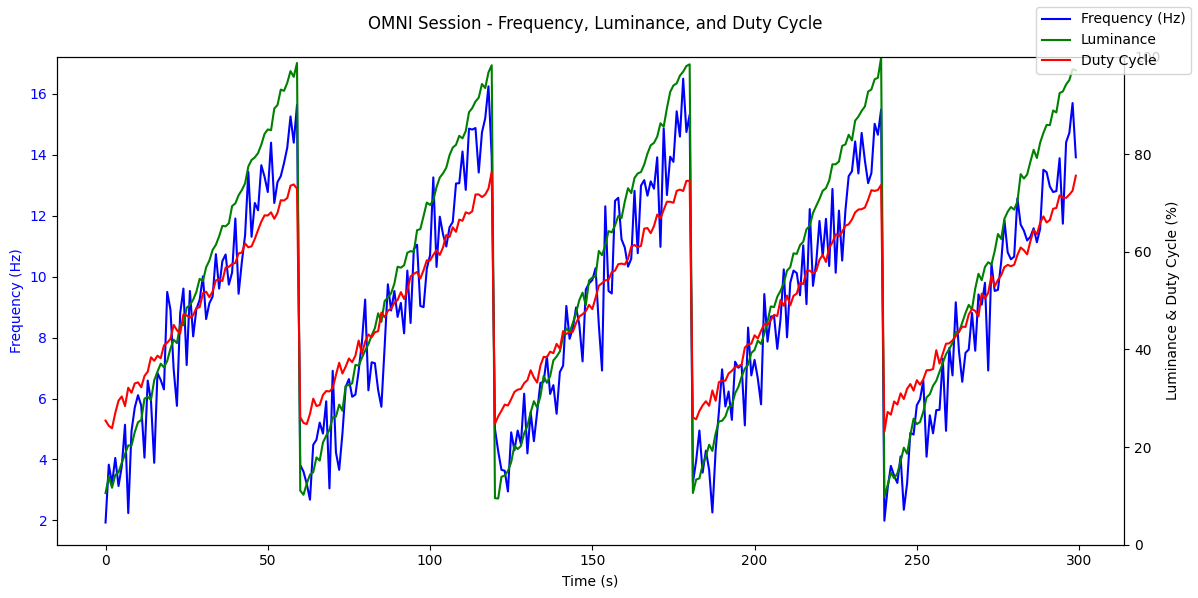

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# File paths for session data
session_files = {
    "HG": "/content/yHG_Sqz.txt",
    "DP": "/content/yDP_Sqz.txt",
    "CE": "/content/yCE_Sqz.txt",
    "RE": "/content/yRE_Sqz.txt",
    "OM": "/content/yOM_Sqz.txt"
}

# Output file for Omni session
omni_output_path = "/content/yOMNI_Sqz.txt"

# Define which time slice to extract from each session
segment_indices = {
    "HG": 0,   # First 60 lines
    "DP": 60,  # Second 60 lines
    "CE": 120, # Third 60 lines
    "RE": 180, # Fourth 60 lines
    "OM": 240  # Fifth 60 lines
}

# Function to extract the correct 60 STP lines per session
def extract_correct_stp_lines(file_path, start_index, num_lines=60):
    with open(file_path, "r") as f:
        lines = f.readlines()

    # Skip the first two header lines (TIM, DUR)
    stp_lines = [line for line in lines[2:] if line.startswith("STP")]

    # Extract the correct segment
    return stp_lines[start_index:start_index + num_lines]

# Create Omni session by appending the correct time slices
omni_stp_lines = []
for mode, start_index in segment_indices.items():
    omni_stp_lines.extend(extract_correct_stp_lines(session_files[mode], start_index))

# Write the Omni session to a new file in the correct format
with open(omni_output_path, "w") as f:
    f.write(f'TIM"00:00:300.0"\n')
    f.write(f'DUR"300.0"\n')
    f.writelines(omni_stp_lines)

print(f"✅ Successfully generated {omni_output_path} with the correct session segments!")

# -------- PLOT THE NEW OMNI SESSION --------

# Function to extract data from STP lines for plotting
def extract_stp_data(file_path):
    data = []
    with open(file_path, "r") as f:
        for line in f:
            if line.startswith("STP"):
                values = line.strip().split(",")
                frequency = float(values[2])  # Extracting start frequency (use index 2 for start freq)
                luminance = float(values[10]) # Extracting start luminance (use index 10)
                duty_cycle = float(values[4]) # Extracting start duty cycle (use index 4)
                data.append([frequency, luminance, duty_cycle])

    df = pd.DataFrame(data, columns=["Frequency (Hz)", "Luminance", "Duty Cycle (%)"])
    df["Time (s)"] = np.arange(0, 300)
    return df

# Load and plot the newly generated Omni session
df_omni = extract_stp_data(omni_output_path)

fig, ax1 = plt.subplots(figsize=(12, 6))

# Left Y-axis (Frequency)
ax1.set_xlabel("Time (s)")
ax1.set_ylabel("Frequency (Hz)", color="blue")
ax1.plot(df_omni["Time (s)"], df_omni["Frequency (Hz)"], label="Frequency (Hz)", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

# Right Y-axis (Luminance & Duty Cycle)
ax2 = ax1.twinx()
ax2.set_ylabel("Luminance & Duty Cycle (%)", color="black")
ax2.plot(df_omni["Time (s)"], df_omni["Luminance"], label="Luminance", color="green")
ax2.plot(df_omni["Time (s)"], df_omni["Duty Cycle (%)"], label="Duty Cycle", color="red")
ax2.tick_params(axis='y', labelcolor="black")
ax2.set_ylim(0, 100)  # Set range for luminance/duty cycle

fig.suptitle("OMNI Session - Frequency, Luminance, and Duty Cycle")
fig.tight_layout()
fig.legend(loc="upper right")
plt.show()



In [49]:
import numpy as np
import pandas as pd

# Define session parameters
session_duration = 300  # 5 minutes (300 seconds)
time_step = 1.0  # 1s resolution
num_steps = int(session_duration / time_step)

# Define session transition points
session_segments = {
    "HG": (0, 60),
    "OM": (60, 120),
    "DP": (120, 180),
    "CE": (180, 240),
    "RE": (240, 300)
}

# Function to generate structured session transitions
def structured_permutative_transition(progress, min_val, max_val, mode):
    cycle_period = 0.2
    cycle_phase = (progress % cycle_period) / cycle_period
    noise_level = {"harmonic": 0.5, "oscillatory": 1.0, "divergent": 3.0, "chirped": 1.5, "randomized": 4.0}.get(mode, 1.0)
    noise = np.random.normal(0, noise_level)

    if mode == "harmonic":
        return min_val + (max_val - min_val) * (np.sin(cycle_phase * np.pi) ** 2) + noise
    elif mode == "oscillatory":
        return min_val + (max_val - min_val) * (0.5 + 0.5 * np.cos(2 * np.pi * cycle_phase)) + noise
    elif mode == "divergent":
        return (np.random.uniform(min_val, max_val) if np.random.rand() < 0.6 else min_val + (max_val - min_val) * cycle_phase) + noise
    elif mode == "chirped":
        return min_val + (max_val - min_val) * (cycle_phase ** 1.5) + noise
    elif mode == "randomized":
        return (np.random.uniform(min_val, max_val) if np.random.rand() < 0.8 else min_val + (max_val - min_val) * cycle_phase) + noise
    else:
        return min_val + (max_val - min_val) * cycle_phase + noise

# Function to generate session data
def generate_sequence(mode):
    time = np.arange(0, session_duration, time_step)
    frequency = np.zeros(num_steps)
    luminance = np.zeros(num_steps)
    duty_cycle = np.zeros(num_steps)

    for i in range(num_steps):
        progress = i / num_steps
        fade_in = np.sin(progress * np.pi / 2)
        fade_out = np.sin((1 - progress) * np.pi / 2)

        freq = structured_permutative_transition(progress, 3, 15, mode) * fade_in * fade_out or 3
        lum = structured_permutative_transition(progress, 10, 100, mode) * fade_in * fade_out or 10
        duty = structured_permutative_transition(progress, 25, 75, mode) * fade_in * fade_out or 25

        frequency[i] = round(freq, 2)
        luminance[i] = round(lum, 2)
        duty_cycle[i] = round(duty, 2)

    return pd.DataFrame({
        "Time (s)": time.astype(int),
        "Frequency (Hz)": frequency,
        "Luminance": luminance,
        "Duty Cycle (%)": duty_cycle
    })

# Function to save in STP format
def save_as_stp(df, filename):
    """Save structured data into STP formatted text file."""
    output = []
    output.append(f'TIM"00:00:{session_duration:02}.0"')
    output.append(f'DUR"{session_duration:.1f}"')

    for _, row in df.iterrows():
        step_duration = 1.0
        wave_type = 1

        start_freq = [row["Frequency (Hz)"]]*4
        end_freq = [row["Frequency (Hz)"]]*4
        start_duty = [row["Duty Cycle (%)"]]*4
        end_duty = [row["Duty Cycle (%)"]]*4
        start_intensity = [row["Luminance"]]*4
        end_intensity = [row["Luminance"]]*4
        led_assignments = [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]

        stp_line = f'STP"{step_duration:.1f},{wave_type},{start_freq[0]:.2f},{end_freq[0]:.2f},{start_duty[0]},{end_duty[0]},{",".join(map(str, led_assignments[0]))},{start_intensity[0]},{end_intensity[0]}"'
        output.append(stp_line)

    with open(filename, "w", encoding="utf-8") as f:
        f.write("\r\n".join(output))

# Generate and save session files
session_files = {}
for mode in session_segments.keys():
    df = generate_sequence(mode)
    filename = f"/content/y{mode}_Sqz.txt"
    save_as_stp(df, filename)
    session_files[mode] = filename
    print(f"Generated {filename}")


Generated /content/yHG_Sqz.txt
Generated /content/yOM_Sqz.txt
Generated /content/yDP_Sqz.txt
Generated /content/yCE_Sqz.txt
Generated /content/yRE_Sqz.txt


In [50]:
# Output file for Omni session
omni_output_path = "/content/yOMNI_Sqz.txt"

# Define the correct segment indices
segment_indices = {
    "HG": 0,
    "DP": 60,
    "CE": 120,
    "RE": 180,
    "OM": 240
}

# Extract & merge the correct 60-line segments
omni_stp_lines = []
for mode, start_index in segment_indices.items():
    with open(session_files[mode], "r", encoding="utf-8") as f:
        lines = f.readlines()
        stp_lines = [line for line in lines[2:] if line.startswith("STP")]
        selected_segment = stp_lines[start_index:start_index + 60]
        omni_stp_lines.extend(selected_segment)

# Save the merged Omni session
with open(omni_output_path, "w", encoding="utf-8") as f:
    f.write(f'TIM"00:00:300.0"\n')
    f.write(f'DUR"300.0"\n')
    f.writelines(omni_stp_lines)

print(f"✅ Generated {omni_output_path} with correct session segments!")


✅ Generated /content/yOMNI_Sqz.txt with correct session segments!


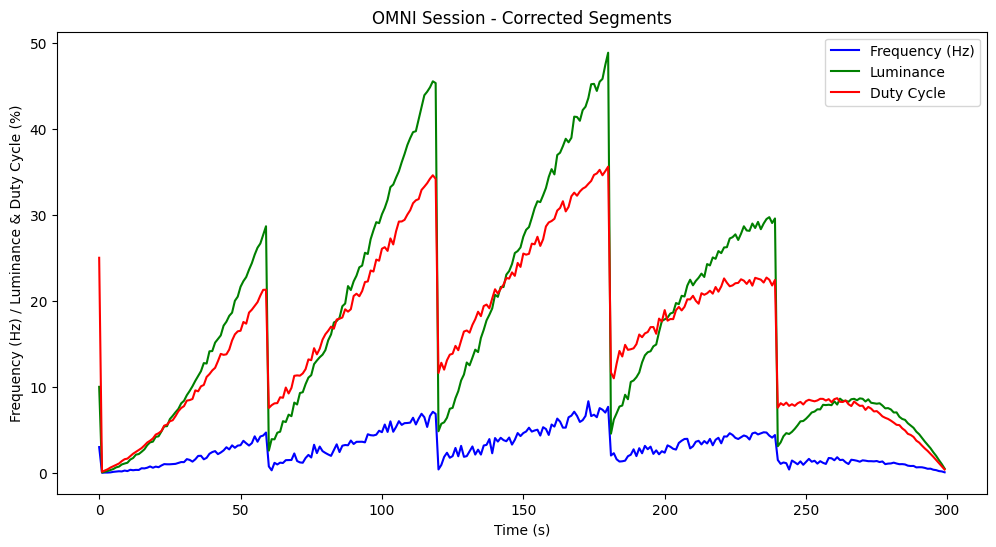

In [51]:
# Load OMNI session data
df_omni = extract_stp_data(omni_output_path)

plt.figure(figsize=(12, 6))
plt.plot(df_omni["Time (s)"], df_omni["Frequency (Hz)"], label="Frequency (Hz)", color="blue")
plt.plot(df_omni["Time (s)"], df_omni["Luminance"], label="Luminance", color="green")
plt.plot(df_omni["Time (s)"], df_omni["Duty Cycle (%)"], label="Duty Cycle", color="red")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz) / Luminance & Duty Cycle (%)")
plt.title("OMNI Session - Corrected Segments")
plt.legend()
plt.show()


Generated /content/yHG_Sqz.txt
Generated /content/yOM_Sqz.txt
Generated /content/yDP_Sqz.txt
Generated /content/yCE_Sqz.txt
Generated /content/yRE_Sqz.txt


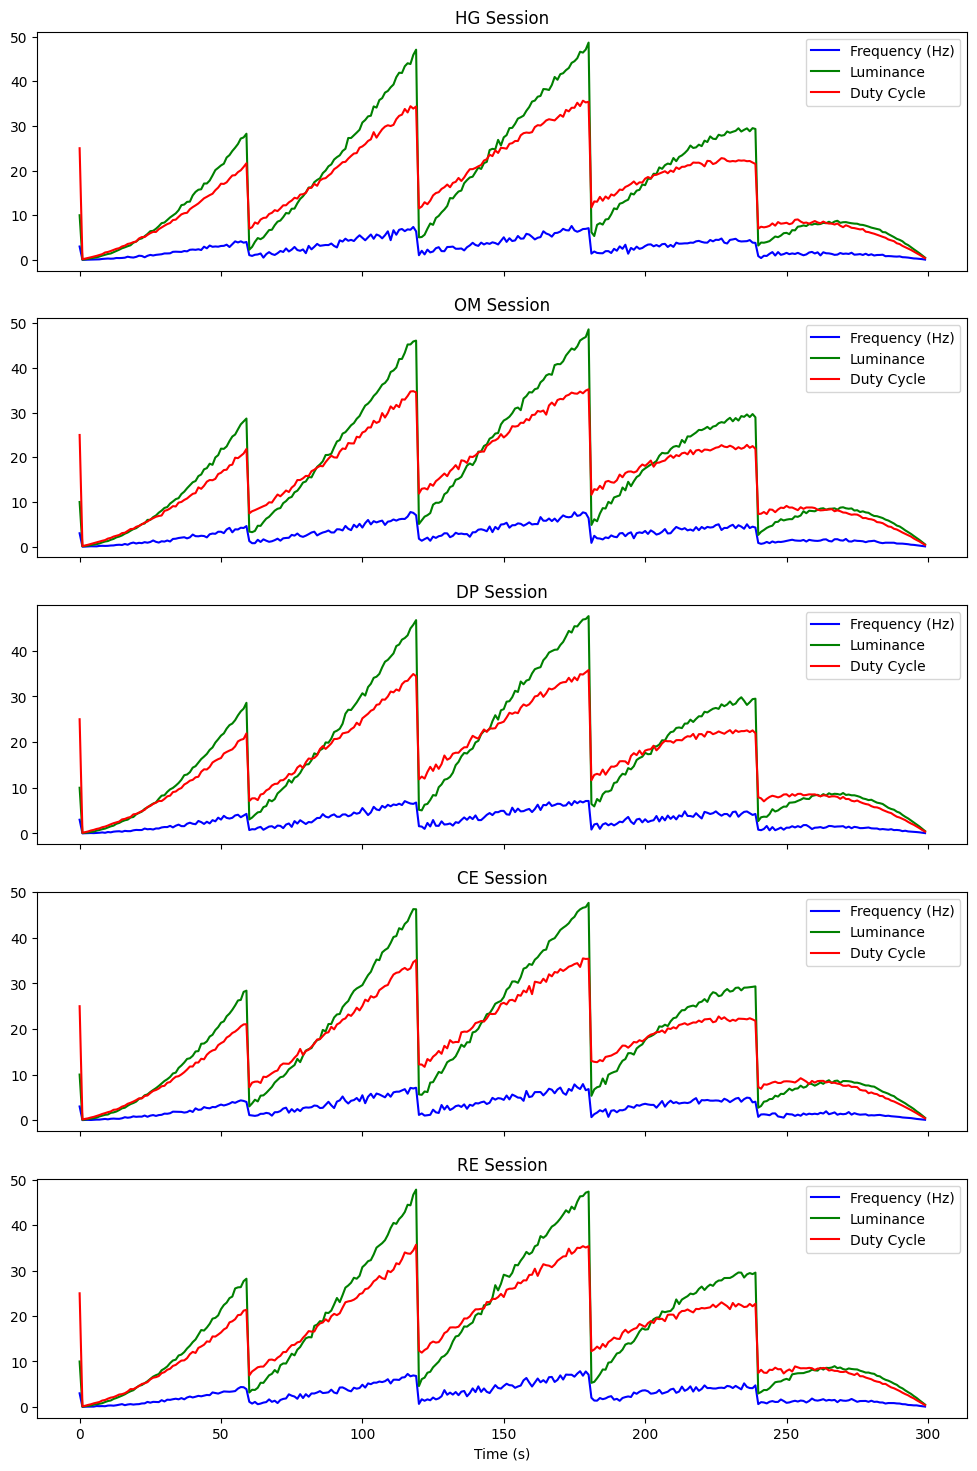

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Session parameters
session_duration = 300  # 5 minutes (300 seconds)
time_step = 1.0  # 1s resolution
stp_step = 0.1  # STP minimum step
num_steps = int(session_duration / time_step)

# Parameter constraints
frequency_range = (3, 15)  # Hz
luminance_range = (10, 100)  # Arbitrary units
duty_cycle_range = (25, 75)  # Percentage

# Define session transition points
session_segments = {
    "HG": (0, 60),
    "OM": (60, 120),
    "DP": (120, 180),
    "CE": (180, 240),
    "RE": (240, 300)
}

# Function to generate structured session transitions
def structured_permutative_transition(progress, min_val, max_val, mode):
    cycle_period = 0.2
    cycle_phase = (progress % cycle_period) / cycle_period
    noise_level = {"harmonic": 0.5, "oscillatory": 1.0, "divergent": 3.0, "chirped": 1.5, "randomized": 4.0}.get(mode, 1.0)
    noise = np.random.normal(0, noise_level)

    if mode == "harmonic":
        return min_val + (max_val - min_val) * (np.sin(cycle_phase * np.pi) ** 2) + noise
    elif mode == "oscillatory":
        return min_val + (max_val - min_val) * (0.5 + 0.5 * np.cos(2 * np.pi * cycle_phase)) + noise
    elif mode == "divergent":
        return (np.random.uniform(min_val, max_val) if np.random.rand() < 0.6 else min_val + (max_val - min_val) * cycle_phase) + noise
    elif mode == "chirped":
        return min_val + (max_val - min_val) * (cycle_phase ** 1.5) + noise
    elif mode == "randomized":
        return (np.random.uniform(min_val, max_val) if np.random.rand() < 0.8 else min_val + (max_val - min_val) * cycle_phase) + noise
    else:
        return min_val + (max_val - min_val) * cycle_phase + noise

# Function to generate session data
def generate_sequence(mode):
    time = np.arange(0, session_duration, time_step)
    frequency = np.zeros(num_steps)
    luminance = np.zeros(num_steps)
    duty_cycle = np.zeros(num_steps)

    for i in range(num_steps):
        progress = i / num_steps
        fade_in = np.sin(progress * np.pi / 2)
        fade_out = np.sin((1 - progress) * np.pi / 2)

        freq = structured_permutative_transition(progress, 3, 15, mode) * fade_in * fade_out or 3
        lum = structured_permutative_transition(progress, 10, 100, mode) * fade_in * fade_out or 10
        duty = structured_permutative_transition(progress, 25, 75, mode) * fade_in * fade_out or 25

        frequency[i] = round(freq, 2)
        luminance[i] = round(lum, 2)
        duty_cycle[i] = round(duty, 2)

    return pd.DataFrame({
        "Time (s)": time.astype(int),
        "Frequency (Hz)": frequency,
        "Luminance": luminance,
        "Duty Cycle (%)": duty_cycle
    })

# Function to save in STP format
def save_as_stp(df, filename):
    output = []
    output.append(f'TIM"00:00:{session_duration:02}.0"')
    output.append(f'DUR"{session_duration:.1f}"')

    for i in range(0, len(df), int(time_step / stp_step)):
        step_duration = stp_step
        wave_type = 1

        start_freq = df.iloc[i]["Frequency (Hz)"]
        end_freq = df.iloc[min(i + int(time_step / stp_step) - 1, len(df) - 1)]["Frequency (Hz)"]
        start_duty = df.iloc[i]["Duty Cycle (%)"]
        end_duty = df.iloc[min(i + int(time_step / stp_step) - 1, len(df) - 1)]["Duty Cycle (%)"]
        start_intensity = df.iloc[i]["Luminance"]
        end_intensity = df.iloc[min(i + int(time_step / stp_step) - 1, len(df) - 1)]["Luminance"]
        led_assignments = "1,0,0,0"

        stp_line = f'STP"{step_duration:.1f},{wave_type},{start_freq:.2f},{end_freq:.2f},{start_duty},{end_duty},{led_assignments},{start_intensity},{end_intensity}"'
        output.append(stp_line)

    with open(filename, "w", encoding="utf-8") as f:
        f.write("\r\n".join(output))

# Generate and save session files
session_files = {}
base_sequences = {}

for mode in session_segments.keys():
    df = generate_sequence(mode)
    base_sequences[mode] = df
    filename = f"/content/y{mode}_Sqz.txt"
    save_as_stp(df, filename)
    session_files[mode] = filename
    print(f"Generated {filename}")

# Plot original sequences
fig, axes = plt.subplots(len(session_segments), 1, figsize=(12, 18), sharex=True)
for ax, (mode, df) in zip(axes, base_sequences.items()):
    ax.plot(df["Time (s)"], df["Frequency (Hz)"], label="Frequency (Hz)", color="blue")
    ax.plot(df["Time (s)"], df["Luminance"], label="Luminance", color="green")
    ax.plot(df["Time (s)"], df["Duty Cycle (%)"], label="Duty Cycle", color="red")
    ax.set_title(f"{mode} Session")
    ax.legend()
plt.xlabel("Time (s)")
plt.show()



Let's start over.

In [4]:
import numpy as np
import pandas as pd
import os

# Session parameters
session_duration = 300  # 5 minutes (300 seconds)
time_step = 1.0  # 1s resolution
num_steps = int(session_duration / time_step)

# Parameter constraints
frequency_range = (3, 15)  # Hz
luminance_range = (10, 100)  # Arbitrary units
duty_cycle_range = (25, 75)  # Percentage
max_freq_jump_ratio = 2.2  # Maximum allowed frequency jump multiplier
max_duty_jump = 25  # Maximum duty cycle jump

# Function to generate structured session transitions
def generate_sequence(mode):
    time = np.arange(0, session_duration, time_step)
    frequency = np.zeros(num_steps)
    luminance = np.zeros(num_steps)
    duty_cycle = np.zeros(num_steps)

    # Initial conditions
    freq = np.random.uniform(*frequency_range)
    lum = np.random.uniform(*luminance_range)
    duty = np.random.uniform(*duty_cycle_range)

    for i in range(num_steps):
        progress = i / num_steps

        # Frequency Modulation based on mode
        if mode == "harmonic_glide":
            freq = 3 + 12 * progress
        elif mode == "oscillatory_mode":
            freq = 9 + 6 * np.sin(i / 50)
        elif mode == "divergent_pattern":
            if i % 50 == 0:
                freq = np.random.choice(np.linspace(3, 15, 7))
        elif mode == "chirped_excitation":
            freq = 3 * (1 + progress * 4)
        elif mode == "randomized_exploration":
            freq = np.random.uniform(*frequency_range)

        # Constrain frequency jumps
        if i > 0:
            max_step = frequency[i - 1] * max_freq_jump_ratio
            freq = min(freq, max_step)

        # Constrain values within range
        freq = np.clip(freq, *frequency_range)
        lum = np.clip(lum + np.random.uniform(-5, 5), *luminance_range)

        # Constrain duty cycle jumps
        if i > 0:
            max_step = duty_cycle[i - 1] + max_duty_jump
            duty = min(duty, max_step)

        duty = np.clip(duty, *duty_cycle_range)

        # Store values
        frequency[i] = round(freq, 2)
        luminance[i] = round(lum)
        duty_cycle[i] = round(duty)

    return pd.DataFrame({
        "Time (s)": time.astype(int),
        "Frequency (Hz)": frequency,
        "Luminance": luminance,
        "Duty Cycle (%)": duty_cycle
    })

# Generate all sequences
base_sequences = {
    "HG": generate_sequence("harmonic_glide"),
    "OM": generate_sequence("oscillatory_mode"),
    "DP": generate_sequence("divergent_pattern"),
    "CE": generate_sequence("chirped_excitation"),
    "RE": generate_sequence("randomized_exploration"),
}

# Save session files
session_path = "/content/"
os.makedirs(session_path, exist_ok=True)

for name, df in base_sequences.items():
    filename = os.path.join(session_path, f"{name}_Sqz.txt")
    df.to_csv(filename, sep="\t", index=False)
    print(f"Saved: {filename}")

# -------------------------
#     FORMAT STP FILES
# -------------------------
def format_stp(df):
    """Formats a DataFrame into STP format while preserving the original dynamics."""
    output = []
    session_duration = df["Time (s)"].max()
    output.append(f'TIM"00:00:{session_duration:.1f}"')
    output.append(f'DUR"{session_duration:.1f}"')

    for i in range(len(df) - 1):
        step_duration = df.loc[i + 1, "Time (s)"] - df.loc[i, "Time (s)"]
        step_duration = max(0.1, round(step_duration, 1))  # Ensure min STP duration is 0.1s

        # Extract values, ensuring min frequency and whole numbers for luminance & duty cycle
        start_freq = max(df.loc[i, "Frequency (Hz)"], 0.5)
        end_freq = max(df.loc[i + 1, "Frequency (Hz)"], 0.5)
        start_lum = max(0, round(df.loc[i, "Luminance"]))
        end_lum = max(0, round(df.loc[i + 1, "Luminance"]))
        start_duty = max(0, round(df.loc[i, "Duty Cycle (%)"]))
        end_duty = max(0, round(df.loc[i + 1, "Duty Cycle (%)"]))

        # Generate STP line
        stp_line = f'STP"{step_duration:.1f},1,{start_freq:.2f},{end_freq:.2f},{start_duty},{end_duty},1,0,0,0,{start_lum},{end_lum}"'
        output.append(stp_line)

    return output

# Generate corrected STP files
stp_path = "/content/STP/"
os.makedirs(stp_path, exist_ok=True)
stp_sessions = {}

for name, df in base_sequences.items():
    stp_content = format_stp(df)
    stp_filename = os.path.join(stp_path, f"{name}_STP.txt")  # 🔹 FIXED FILENAME FORMAT

    with open(stp_filename, "w", encoding="utf-8") as f:
        f.write("\r\n".join(stp_content))

    stp_sessions[name] = stp_filename  # 🔹 Ensure proper dictionary key matches file name

print("Corrected STP files saved.")

# -------------------------
#  CREATE THE OMNI SESSION
# -------------------------

# Define session order for OMNI
session_segments = {
    "HG": 0,
    "DP": 60,
    "CE": 120,
    "RE": 180,
    "OM": 240
}

# Create the OMNI session file
omni_output = []
omni_duration = 300  # 5 minutes total
omni_output.append(f'TIM"00:00:{omni_duration:.1f}"')
omni_output.append(f'DUR"{omni_duration:.1f}"')

# Extract the correct 60-line segments per session
for session, start_index in session_segments.items():
    session_key = f"{session}_STP.txt"

    # Correcting lookup by specifying the directory
    stp_file = os.path.join(stp_path, session_key)

    if os.path.exists(stp_file):
        with open(stp_file, "r", encoding="utf-8") as f:
            lines = f.readlines()
            stp_lines = [line for line in lines if line.startswith("STP")]
            selected_segment = stp_lines[start_index:start_index + 60]
            omni_output.extend(selected_segment)
    else:
        raise KeyError(f"Session file {session_key} not found! Available files: {os.listdir(stp_path)}")

    with open(stp_file, "r", encoding="utf-8") as f:
        lines = f.readlines()
        stp_lines = [line for line in lines if line.startswith("STP")]
        selected_segment = stp_lines[start_index:start_index + 60]
        omni_output.extend(selected_segment)

# Save the OMNI session
omni_filename = os.path.join(stp_path, "yOMNI_Sqz.txt")
with open(omni_filename, "w", encoding="utf-8") as f:
    f.write("\r\n".join(omni_output))

print(f"OMNI session saved as {omni_filename}")

Saved: /content/HG_Sqz.txt
Saved: /content/OM_Sqz.txt
Saved: /content/DP_Sqz.txt
Saved: /content/CE_Sqz.txt
Saved: /content/RE_Sqz.txt
Corrected STP files saved.
OMNI session saved as /content/STP/yOMNI_Sqz.txt


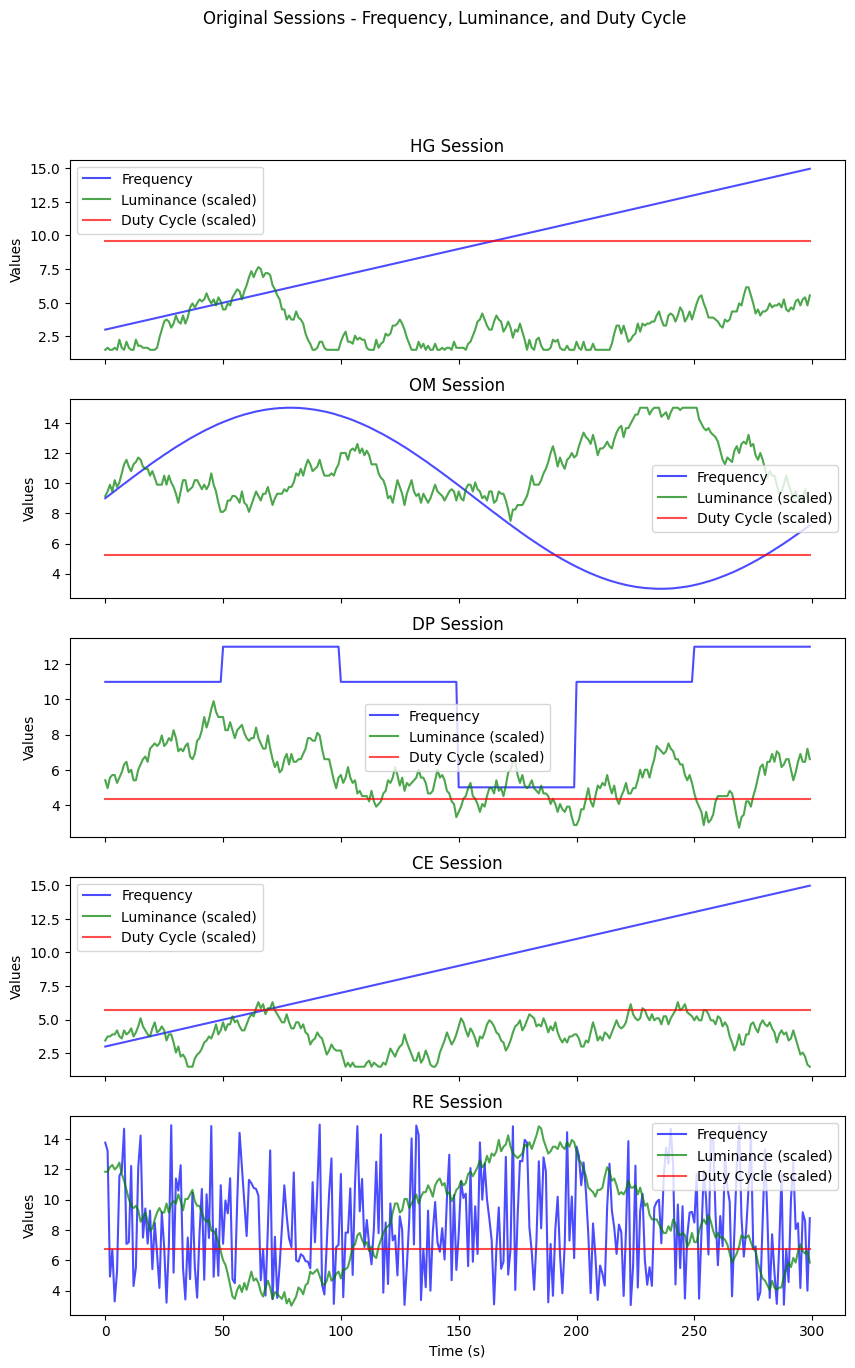

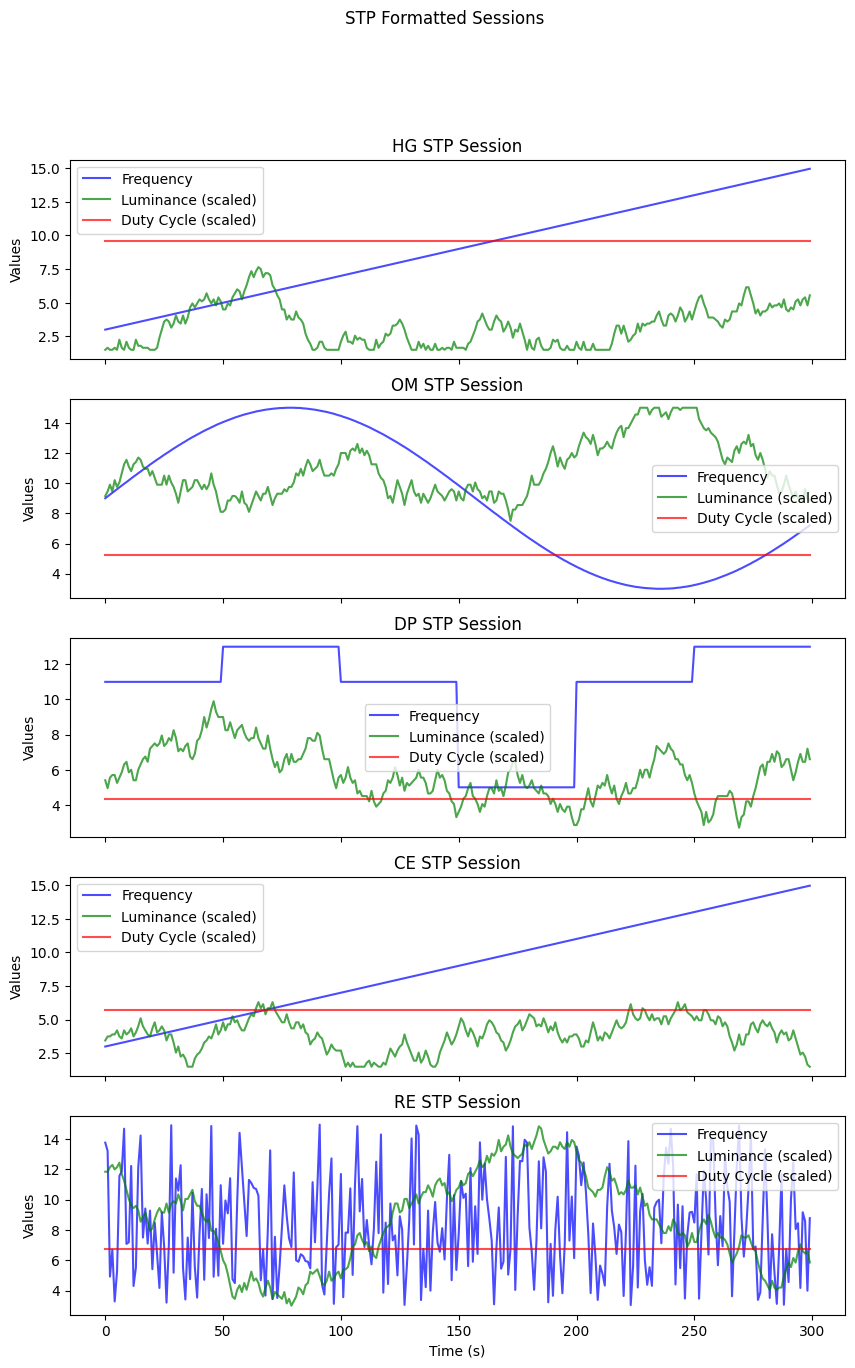

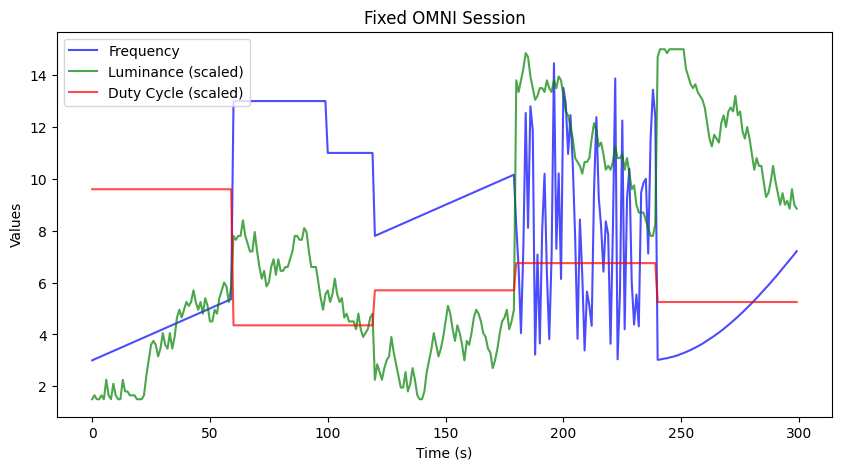

In [6]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# Session parameters
session_duration = 300  # 5 minutes (300 seconds)
time_step = 1.0  # 1s resolution
num_steps = int(session_duration / time_step)

# Parameter constraints
frequency_range = (3, 15)  # Hz
luminance_range = (10, 100)  # Arbitrary units
duty_cycle_range = (25, 75)  # Percentage
max_freq_jump_ratio = 2.2  # Maximum allowed frequency jump multiplier
max_duty_jump = 25  # Maximum duty cycle jump

# Function to generate structured session transitions
def generate_sequence(mode):
    time = np.arange(0, session_duration, time_step)
    frequency = np.zeros(num_steps)
    luminance = np.zeros(num_steps)
    duty_cycle = np.zeros(num_steps)

    # Initial conditions
    freq = np.random.uniform(*frequency_range)
    lum = np.random.uniform(*luminance_range)
    duty = np.random.uniform(*duty_cycle_range)

    for i in range(num_steps):
        progress = i / num_steps

        # Frequency Modulation based on mode
        if mode == "harmonic_glide":
            freq = 3 + 12 * progress
        elif mode == "oscillatory_mode":
            freq = 9 + 6 * np.sin(i / 50)
        elif mode == "divergent_pattern":
            if i % 50 == 0:
                freq = np.random.choice(np.linspace(3, 15, 7))
        elif mode == "chirped_excitation":
            freq = 3 * (1 + progress * 4)
        elif mode == "randomized_exploration":
            freq = np.random.uniform(*frequency_range)

        # Constrain frequency jumps
        if i > 0:
            max_step = frequency[i - 1] * max_freq_jump_ratio
            freq = min(freq, max_step)

        # Constrain values within range
        freq = np.clip(freq, *frequency_range)
        lum = np.clip(lum + np.random.uniform(-5, 5), *luminance_range)

        # Constrain duty cycle jumps
        if i > 0:
            max_step = duty_cycle[i - 1] + max_duty_jump
            duty = min(duty, max_step)

        duty = np.clip(duty, *duty_cycle_range)

        # Store values
        frequency[i] = round(freq, 2)
        luminance[i] = round(lum)
        duty_cycle[i] = round(duty)

    return pd.DataFrame({
        "Time (s)": time.astype(int),
        "Frequency (Hz)": frequency,
        "Luminance": luminance,
        "Duty Cycle (%)": duty_cycle
    })

# Generate all sequences
base_sequences = {
    "HG": generate_sequence("harmonic_glide"),
    "OM": generate_sequence("oscillatory_mode"),
    "DP": generate_sequence("divergent_pattern"),
    "CE": generate_sequence("chirped_excitation"),
    "RE": generate_sequence("randomized_exploration"),
}

# -------------------------
#     PLOT ORIGINAL SEQUENCES
# -------------------------
fig, axes = plt.subplots(5, 1, figsize=(10, 15), sharex=True)

for ax, (mode, df) in zip(axes, base_sequences.items()):
    ax.plot(df["Time (s)"], df["Frequency (Hz)"], label="Frequency", color="blue", alpha=0.7)
    ax.plot(df["Time (s)"], df["Luminance"] / 100 * 15, label="Luminance (scaled)", color="green", alpha=0.7)
    ax.plot(df["Time (s)"], df["Duty Cycle (%)"] / 100 * 15, label="Duty Cycle (scaled)", color="red", alpha=0.7)
    ax.set_ylabel("Values")
    ax.set_title(f"{mode} Session")
    ax.legend()

plt.xlabel("Time (s)")
plt.suptitle("Original Sessions - Frequency, Luminance, and Duty Cycle")
plt.show()

# -------------------------
#     FORMAT STP FILES
# -------------------------
def format_stp(df):
    """Formats a DataFrame into STP format while preserving the original dynamics."""
    output = []
    session_duration = df["Time (s)"].max()
    output.append(f'TIM"00:00:{session_duration:.1f}"')
    output.append(f'DUR"{session_duration:.1f}"')

    for i in range(len(df) - 1):
        step_duration = df.loc[i + 1, "Time (s)"] - df.loc[i, "Time (s)"]
        step_duration = max(0.1, round(step_duration, 1))  # Ensure min STP duration is 0.1s

        # Extract values, ensuring min frequency and whole numbers for luminance & duty cycle
        start_freq = max(df.loc[i, "Frequency (Hz)"], 0.5)
        end_freq = max(df.loc[i + 1, "Frequency (Hz)"], 0.5)
        start_lum = max(0, round(df.loc[i, "Luminance"]))
        end_lum = max(0, round(df.loc[i + 1, "Luminance"]))
        start_duty = max(0, round(df.loc[i, "Duty Cycle (%)"]))
        end_duty = max(0, round(df.loc[i + 1, "Duty Cycle (%)"]))

        # Generate STP line
        stp_line = f'STP"{step_duration:.1f},1,{start_freq:.2f},{end_freq:.2f},{start_duty},{end_duty},1,0,0,0,{start_lum},{end_lum}"'
        output.append(stp_line)

    return output

# Generate corrected STP files
stp_sequences = {}
for name, df in base_sequences.items():
    stp_sequences[name] = format_stp(df)

# -------------------------
#     PLOT STP FORMATTED SEQUENCES
# -------------------------
fig, axes = plt.subplots(5, 1, figsize=(10, 15), sharex=True)

for ax, (mode, df) in zip(axes, base_sequences.items()):
    ax.plot(df["Time (s)"], df["Frequency (Hz)"], label="Frequency", color="blue", alpha=0.7)
    ax.plot(df["Time (s)"], df["Luminance"] / 100 * 15, label="Luminance (scaled)", color="green", alpha=0.7)
    ax.plot(df["Time (s)"], df["Duty Cycle (%)"] / 100 * 15, label="Duty Cycle (scaled)", color="red", alpha=0.7)
    ax.set_ylabel("Values")
    ax.set_title(f"{mode} STP Session")
    ax.legend()

plt.xlabel("Time (s)")
plt.suptitle("STP Formatted Sessions")
plt.show()

# -------------------------
#  CREATE THE OMNI SESSION (Proper Segmentation)
# -------------------------

# Define the session order for OMNI (each session contributes 60s)
session_segments = {
    "HG": (0, 60),
    "DP": (60, 120),
    "CE": (120, 180),
    "RE": (180, 240),
    "OM": (240, 300)
}

# Extract 60-second segments from each session
omni_df_list = []
for session, (start, end) in session_segments.items():
    df = base_sequences[session]
    segment = df[(df["Time (s)"] >= start) & (df["Time (s)"] < end)].copy()

    # Normalize time to be continuous across OMNI session
    segment["Time (s)"] = segment["Time (s)"] - start + (len(omni_df_list) * 60)
    omni_df_list.append(segment)

# Combine properly segmented data
omni_df = pd.concat(omni_df_list).reset_index(drop=True)

# -------------------------
#     PLOT FIXED OMNI SESSION
# -------------------------
plt.figure(figsize=(10, 5))
plt.plot(omni_df["Time (s)"], omni_df["Frequency (Hz)"], label="Frequency", color="blue", alpha=0.7)
plt.plot(omni_df["Time (s)"], omni_df["Luminance"] / 100 * 15, label="Luminance (scaled)", color="green", alpha=0.7)
plt.plot(omni_df["Time (s)"], omni_df["Duty Cycle (%)"] / 100 * 15, label="Duty Cycle (scaled)", color="red", alpha=0.7)
plt.ylabel("Values")
plt.xlabel("Time (s)")
plt.title("Fixed OMNI Session")
plt.legend()
plt.show()